# Dynamics, Classical to Continuum

We expand our attention from linear systems of  *algebraic*  equations to linear
systems of  *differential*  equations in the quest to understand the dynamical behavior of
electrical, mechanical and metabolic networks. Although the dynamical phenomena that 
we will be able to explain are indeed substantially richer than the equilibria that occupied
our earlier study we will see, miraculously, that the requisite mathematical techniques remain 
essentially  *algebraic*  in nature.

Our first, and easiest, task will be to show, with regard to building models, 
that the methodology of the Strang Quartet extends naturally to linear dynamical systems.
Next, we will argue that the Laplace Transform takes the differential equation $x'(t)=Bx(t)$,
where $B\in\maR^{n\times n}$,
into an algebraic equation whose easy solution may pass through the Inverse Laplace Transform,
and back to $x(t)$, once one has mastered the eigenvalue problem, $Bv=\la v$. In this chapter
we  *motivate*, via many varied examples, rather than *master* , the eigenvalue problem. These
examples provide a physical appreciation for the importance of eigenvalues to
dynamics - largely through their role in the matrix exponential, $\exp(Bt)$.
This appreciation, it is hoped, will whet the appetite for mastery of the eigenproblem and
sustain the reader through two supporting chapters on the calculus of functions of a complex variable. 

In addition to our analytical approach through the Laplace Transform and eigenvalue problem
we also pursue approximate, or numerical, means to solving $x'(t)=Bx(t)$. On
discretizing time this equation becomes  *immediately*  algebraic and so very simple, in light
of our last 7 chapters, to code and analyze. We carry this out for electrical and mechanical networks
and show that this method extends naturally to the nonlinear systems, $x'(t)=F(x(t))$, that
appear in modeling the dynamics of metabolic networks.


## Dynamics of Electrical Networks

In Chapter 2 we modeled and obtained the neuron's response to
a  *steady*  (constant) stimulus. In reality, neurons receive and integrate
an ongoing barage of  *transient*  stimuli. These time varying stimuli 
engage time sensitive properties of the cell membrane.

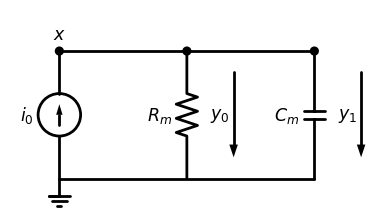

In [34]:
# 1 compartment RC neuron
import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

Ls = d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Rs = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rs, label='$y_0$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1).at(Rs).label('$y_0$').down()
d.pop()
d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Cs = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cs, label='$y_1$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1).at(Cs).label('$y_1$').down()

d.add(elm.LINE, d='left', tox = Ls.start)
d.add(elm.GND)
d.add(elm.SOURCE_I, d='up', label='$i_0$')

node = d.add(elm.DOT)
node.add_label('$x$',loc = 'top') 

d.draw()

\begin{myfig}\label{fig:rc1fig}
A single compartment neuron.
\end{myfig}


In particular, beginning with the single compartment model in
Fig. \ref{example:rc1fig}, we note that the cell membrane actively maintains a gradient of sodium, potassium and chloride ions. This gradient sets the stage for charge to accumulate on either side of the membrane in much the same way that a **capacitor** separates charge. The current through an ideal capacitor is proportional to the time rate of change of the 
voltage drop across the capacitor. With the convention that circuit diagrams come with arrows for current, the voltage drop is computed as voltage at the arrow's tail minus voltage at the arrow's head. With regard to the figure below, this reads


\begin{equation}
  y_1(t) = C_m\frac{dx(t)}{dt}  \label{eq:caplaw}
\end{equation}


Here $x(t)$ is the transmembrane potential at time
$t$ and $C_m$ is the membrane capacitance. Capacitance is reported in Farads after Michael Faraday and (\ref{eq:caplaw}) reveals that a Farad is an Ampere second per Volt, or second per Ohm on recalling Ohm's Law. Speaking of which we next record an Ohmic current


\begin{equation*}
  y_0 = x(t)/R_m,
\end{equation*}


where $R_m$ is the membrane resistance in the circuit below. These currents combine, via Kirchhoff's Current Law, $i_0=y_0+y_1$, resulting in the  **differential equation** (using prime for d/dt)


\begin{equation}
  C_mx'(t) + x(t)/R_m = i_0(t) \label{eq:rc0}
\end{equation}


for the neuronal response, $x(t)$, to the transient current stimulus, $i_0(t)$. As $\tau\equiv R_mC_m$ has the convenient units of seconds we typically clear the fraction in (\ref{eq:rc0}) and arrive at


\begin{equation}
  \boxed{\tau x'(t) + x(t) = f(t)} \hskip 0.5in f(t)\equiv R_mi_0(t) \label{eq:rc1}
\end{equation}

The easiest differential equations to solve are the ones that are pure derivatives. 
To that end we note that the product rule for differentiation permits


\begin{equation*}
  (x(t)\exp(t/\tau))' = (x'(t)/\tau+x(t))\exp(t/\tau).
\end{equation*}


As this right hand side is just the light side of (\ref{eq:rc1}) times $\exp(t/\tau)$ we note that multiplication of (\ref{eq:rc1}) by $\exp(t/\tau)$ reveals


\begin{equation*}
  (x(t)\exp(t/\tau))' = \exp(t/\tau)f(t).
\end{equation*}


On integrating each side from the initial time, $t=0$, to some later time, $t=r$, the Fundamental Theorem of
Calculus yields


\begin{equation*}
  x(r)\exp(r/\tau) - x(0) = \int_0^r \exp(t/\tau)f(t)\,dt,
\end{equation*}


which after moving the initial voltage, $x(0)$, to the other side, and multiplying through 
by $\exp(-r/\tau)$ brings the final, explicit representation


\begin{equation}    \label{eq:rc2x}
  \boxed{x(r) = \exp(-r/\tau)x(0) + \int_0^r\exp((t-r)/\tau)f(t)\,dt.}
\end{equation}

The simplest stimulus is likely the unit step, $f(t)=1$. On using this in (\ref{eq:rc2x}) with $x(0)=0$ we integrate by hand and find

\begin{equation} \label{eq:USRrc1}
  x(r) = 1 - \exp(-r/\tau). 
\end{equation}

We graph this in Figure \ref{fig:usrrc1} and note that it depicts the charging of the membrane with time contant $\tau$.

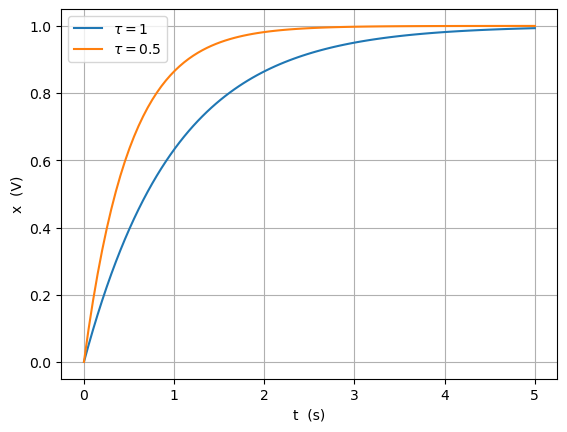

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,5,100)
tau = 1
x = 1 - np.exp(-t/tau)
plt.plot(t, x)
tau = 0.5
x = 1 - np.exp(-t/tau)
plt.plot(t, x)
plt.legend(['$\\tau=1$','$\\tau=0.5$'])
plt.grid('on')
plt.xlabel('t  (s)')
plt.ylabel('x  (V)')
plt.show()

\begin{myfig}
\label{fig:usrrc1} The unit step response of the single-compartment RC neuron. We note that smaller time constants correspond to more rapid charging.
\end{myfig}


We now move on to the multicompartment circuit (neuron) and show that
the strategy of the Strang Quartet from Chapter \secref{elec} offers
a principled path to larger models and that the explicit solution,
(\ref{eq:rc2x}), to the scalar problem has a natural generalization in terms of
the matrix exponential. 

In order that the details not obscure the ideas we proceed gently and consider first the 
two compartment model of Figure \ref{fig:rc2fig}.

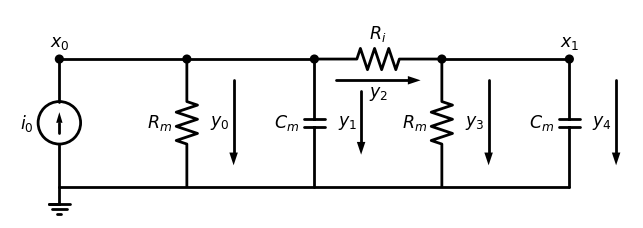

In [41]:
# 2 compartment RC neuron
import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

Ls = d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Rs = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rs, label='$y_0$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1).at(Rs).label('$y_0$').down()
d.pop()
d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Cs = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cs, label='$y_1$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length = 1.5).at(Cs).label('$y_1$').down()
d.pop()

Ra = d.add(elm.RES, label='$R_i$')
#d.labelI(Ra, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d += elm.CurrentLabel(top=False, ofst=0.5).at(Ra).label('$y_2$')
node = d.add(elm.DOT)
d.push()

Rm = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rm, label='$y_3$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1).at(Rm).label('$y_3$').down()

d.pop()
d.add(elm.LINE, d='right')
node = d.add(elm.DOT)
node.add_label('$x_1$',loc = 'top') 
Cm = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cm, label='$y_4$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1).at(Cm).label('$y_4$').down()

d.add(elm.LINE, d='left', tox = Ls.start)
d.add(elm.GND)
d.add(elm.SOURCE_I, d='up', label='$i_0$')

node = d.add(elm.DOT)
node.add_label('$x_0$',loc = 'top') 

d.draw()


\begin{myfig}\label{fig:rc2fig}
A two compartment RC neuron. We now have an axial connection, with intracellular resistance $R_i$, connecting our two compartments.
\end{myfig}

We ask now how the static Strang Quartet of Chapter 2 should be augmented.
Regarding it's first step, (S1'), we proceed as before. The voltage drops across each device (following each arrow and subtracting head voltage from tail voltage) are

\begin{equation}\label{eq:rce}
  e_0 = x_0,\hskip 0.25in e_1 = x_0,\hskip 0.25in e_2 = x_0-x_1, \hskip 0.25in e_3 = x_1, \hskip 0.25in
 e_4 = x_1, 
\end{equation}

and so these voltage drops are indeed linear combinations of the voltages, i.e.,

\begin{equation}\label{eq:rcemat}
  e = - Ax \where 
  A = \begin{bmatrix}-1 & 0 \cr
		    -1 & 0 \cr
		    -1 & 1 \cr
             0 & -1 \cr
             0 & -1 \end{bmatrix}.
\end{equation}

At the second stage of the Strang Quartet, in expressing the device currents, we must augment Ohm's law with voltage-current law obeyed by a capacitor, namely (\ref{eq:caplaw}). This yields, 

\begin{equation*}
  y_0 = C_me'_0, \hskip 0.25in y_1 = e_1/R_m, \hskip 0.25in y_2 = e_2/R_i, 
    \hskip 0.25in y_3 = C_me'_3, \hskip 0.25in y_4 = e_4/R_m
\end{equation*}

or, in matrix terms,

\begin{equation*}
  y = Ge + Ce'
\end{equation*}

where $G = {\rm diag}(0\ 1/R_m\ 1/R_i\ 0\ 1/R_m)$ and $C = {\rm diag}(C_m\ 0\ 0\ C_m\ 0)$ 
are the conductance and capacitance matrices.

As Kirchhoff's Current law is insensitive to the type of device occupying an
edge, the third step of the Strang Quartet proceeds exactly as in Chapter 2. Namely,

\begin{equation*}
  i_0-y_0-y_1-y_2 = 0 \and y_2-y_3-y_4=0,
\end{equation*}

or, in matrix terms, 

\begin{equation*}
  A^Ty = -f \where f = [i_0\ 0]^T.
\end{equation*}

The step remains one of assembling, hence

\begin{equation*}
  A^Ty = -f \Rightarrow A^T(Ge+Ce') = -f \Rightarrow 
  A^T(G(-Ax)+C(-Ax')) = -f, 
\end{equation*}

becomes

\begin{equation}
  \boxed{A^TCAx'(t) + A^TGAx(t) = f(t).} \label{eq:ode1}
\end{equation}

where

\begin{equation}
  A^TCA = \begin{bmatrix}C_m & 0 \cr 0 & C_m\end{bmatrix} \and
  A^TGA = \begin{bmatrix}1/R_i+1/R_m & -1/R_i \cr
                   -1/R_i & 1/R_i+1/R_m\end{bmatrix}. \label{eq:rc2mats}
\end{equation}

In the next two sections we will develop analytical and numerical methods for solving systems of differential equations like (\ref{eq:ode1}).

\begin{exercise} \label{exer:threecompRC}
Follow the Strang Quartet procedure to arrive at the system of differential equations for the 3-compartment RC neuron in Figure \ref{fig:3crc}
\end{exercise}

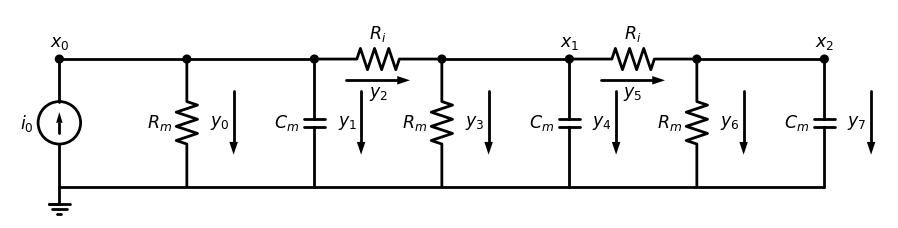

In [44]:
# Three compartment RC neuron
d = schemdraw.Drawing()

Ls = d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Rs = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rs, label='$y_0$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length = 1.5).at(Rs).label('$y_0$').down()
d.pop()
d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Cs = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cs, label='$y_1$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Cs).label('$y_1$').down()
d.pop()

Ra = d.add(elm.RES, label='$R_i$')
#d.labelI(Ra, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d += elm.CurrentLabel(top=False, ofst=0.5, length=1.5).at(Ra).label('$y_2$')
node = d.add(elm.DOT)
d.push()

Rm = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rm, label='$y_3$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Rm).label('$y_3$').down()

d.pop()
d.add(elm.LINE, d='right')
node = d.add(elm.DOT)
node.add_label('$x_1$',loc = 'top') 
d.push()
Cm = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cm, label='$y_4$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Cm).label('$y_4$').down()

d.pop()
Ra = d.add(elm.RES, label='$R_i$')
#d.labelI(Ra, label='$y_5$', arrowofst=0.5, arrowlen=1.5, top=False)
d += elm.CurrentLabel(top=False, ofst=0.5, length=1.5).at(Ra).label('$y_5$')
node = d.add(elm.DOT)
d.push()

Rm = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rm, label='$y_6$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Rm).label('$y_6$').down()

d.pop()
d.add(elm.LINE, d='right')
node = d.add(elm.DOT)
node.add_label('$x_2$',loc = 'top') 
Cm = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cm, label='$y_7$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Cm).label('$y_7$').down()

d.add(elm.LINE, d='left', tox = Ls.start)
d.add(elm.GND)
d.add(elm.SOURCE_I, d='up', label='$i_0$')

node = d.add(elm.DOT)
node.add_label('$x_0$',loc = 'top') 

d.draw()


\begin{myfig}
\label{fig:3crc} A 3 compartment RC neuron. 
\end{myfig}

\begin{exercise}\label{ex:RLCneuron} The neuronal membrane is a highly sophisticated gate keeper and so you may not be surprised to learn that RC circuits don't suffice. When linearizing the complex nonlinearities that govern the membrane's critical ion channels modelers arrive at an associated membrane **inductance**. The voltage drop across an ideal inductor is proportional to the time rate of change of the 
current through the inductor. With regard to Figure \ref{fig:RLC1} below, this reads


\begin{equation}
  x(t) = L_m\frac{dy_2(t)}{dt}  \label{eq:indlaw}
\end{equation}


Note that although Kirchhoff's Current Law is still simply $i_0=y_0+y_1+y_2$ we don't have direct access to $y_2$. We do however have its derivative, through (\ref{eq:indlaw}), and therefore, as Kirchhoff's Current Law is supposed to hold over all time so too must its derivative;


\begin{equation}
  i_0' = y_0' + y_1' + y_2' \label{eq:Dkcl}
\end{equation}


Deduce from (\ref{eq:Dkcl}) and our work above that the voltage $x$ now obeys the second order differential equation


\begin{equation}
  i'_0 = x'/R_m + C_mx'' + x/L_m. \label{eq:RLCode}
\end{equation}

\end{exercise}

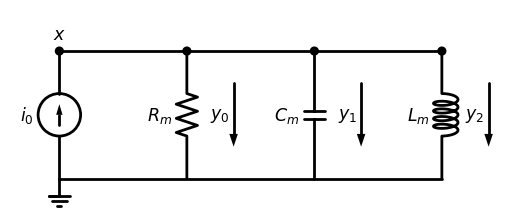

In [45]:
# Draw the single compartment RLC neuron
d = schemdraw.Drawing()

Ls = d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Rs = d.add(elm.RES, label='$R_m$', d='down')
#d.labelI(Rs, label='$y_0$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Rs).label('$y_0$').down()
d.pop()
d.add(elm.LINE, d='right')
d.push()
node = d.add(elm.DOT)
Cs = d.add(elm.CAP, label='$C_m$', d='down')
#d.labelI(Cs, label='$y_1$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Cs).label('$y_1$').down()
d.pop()

d.add(elm.LINE, d='right')
#d.push()
node = d.add(elm.DOT)
Cs = d.add(elm.INDUCTOR2, label='$L_m$', d='down')
#d.labelI(Cs, label='$y_2$', arrowofst=1.1, arrowlen=1.5, top=True)
d += elm.CurrentLabel(top=True, ofst=1.1, length=1.5).at(Cs).label('$y_2$').down()

d.add(elm.LINE, d='left', tox = Ls.start)
d.add(elm.GND)
d.add(elm.SOURCE_I, d='up', label='$i_0$')

node = d.add(elm.DOT)
node.add_label('$x$',loc = 'top') 

d.draw()

\begin{myfig} \label{fig:RLC1} A single compartment RLC neuron. \end{myfig}

## Analytical Methods

Contrasting the two-compartment model, (\ref{eq:ode1}), with the one-compartment
model, (\ref{eq:rc1}), we note that the former can be written

\begin{equation}
  \boxed{x'(t) = Bx(t) + f(t) \where B=-A^TGA/C_m \and f(t) = (i_0(t)/C_m\ 0)^T.}  \label{eq:gode}
\end{equation}

Our goal, over this and the next 4 chapters, is to understand the sense
in which the solution of the scalar problem generalizes to

\begin{equation}
  \boxed{x(T) = \exp(BT)x(0) + \int_0^T\exp(B(T-t))f(t)\,dt.}
  \label{eq:godex}
\end{equation}

More precisely, we will be looking for effective ways to compute
and understand the  **matrix exponential** \index{matrix exponential}

\begin{equation}
  \boxed{\exp(Bt) \equiv \sum_{k=0}^\infty \frac{(Bt)^k}{k!}.}   \label{eq:eBt}
\end{equation}

In attempting to understand the purported solution, (\ref{eq:godex}-\ref{eq:eBt}),
to the matrix problem our first idea is to hew close to the scalar case. 
There we simply multiplied by
the right scalar exponential and integrated. In the matrix case, unsure of the
"right" scalar exponential we begin with a "variable" scalar, $-s$.
In particular, multiplying each side of (\ref{eq:gode}) by $\exp(-st)$ brings

\begin{equation}
  x'(t)\exp(-st) = Bx(t)\exp(-st) + g(t)\exp(-st). \label{eq:lap0}
\end{equation}

The next step in our complete solution of the scalar problem was one of
integration. We start on the left in (\ref{eq:lap0}) and note that

\begin{equation}
  \int_0^T x'(t)\exp(-st)\,dt = x(t)\exp(-st)\bigg|_{t=0}^{t=T} +
   s\int_0^T x(t)\exp(-st)\,dt, \label{eq:lap1}
\end{equation}

upon integrating by parts. This has left us with "mixed" terms in the sense
that the desired $x$ appears both alone and under the integral sign.
We can purify this mix by letting $T\to\infty$ in (\ref{eq:lap1}). More precisely,
under the physically plausible assumption that $x(t)\exp(-st)\to 0$ as 
$t\to\infty$ we deduce from (\ref{eq:lap1}) that

\begin{equation}
  \int_0^\infty x'(t)\exp(-st)\,dt = -x(0) + s\int_0^\infty x(t)\exp(-st)\,dt.
    \label{eq:lap2}
\end{equation}

It follows that if we integrate both sides of (\ref{eq:lap0}) over all time then

\begin{equation}
  s\int_0^\infty x(t)\exp(-st)\,dt - x(0) = B\int_0^\infty x(t)\exp(-st)\,dt + 
    \int_0^\infty g(t)\exp(-st)\,dt. \label{eq:lap3}
\end{equation}

The integral transforms of the known $g$ and unknown $x$ are called the **Laplace Transforms**  of $g$ and $x$ and are written
 
\begin{equation}
  G(s) \equiv \int_0^\infty g(t)\exp(-st)\,dt \and
  X(s) \equiv \int_0^\infty x(t)\exp(-st)\,dt  \label{eq:lapdef}
\end{equation}

to stress their dependence on the variable $s$. With this definition we see
that (\ref{eq:lap3}) becomes $sX(s)-x(0) = BX(s) + G(s)$, or after simple
rearrangement

\begin{equation}
  (sI-B)X(s) = x(0) + G(s). \label{eq:lap4}
\end{equation}

From this we see that if $s$ is such that $(sI-B)$ is invertible then

\begin{equation}
  X(s) = (sI-B)^{-1}(x(0)+G(s)), \label{eq:lap5}
\end{equation}

delivers the Laplace transform of the response in terms of the Laplace transform
of the stimulus.
  
We return to the 2-compartment neuron and assemble the players when

\begin{equation}
  B = \begin{bmatrix} -2 & 1 \\ 1 & -2 \end{bmatrix} \and
  g(t) = \begin{bmatrix} t\exp(-t)\\ 0\end{bmatrix}. \label{eq:lap6}
\end{equation}

The Laplace transform of $g$ is

\begin{equation}
  G(s) = \int_0^\infty \exp(-st)
     \begin{bmatrix} t\exp(-t)\\ 0\end{bmatrix}\,dt = 
   \frac{1}{(s+1)^2}\begin{bmatrix} 1 \\ 0 \end{bmatrix} \label{eq:lap6G}
\end{equation}

and the inverse of $(sI-B)$ may be computed from the general formula

\begin{equation}
  \begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1} =
  \frac{1}{ad-bc}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}.
   \label{eq:inv2}
\end{equation}

In particular,

\begin{equation}
  (sI-B)^{-1} = \frac{1}{(s+1)(s+3)}
      \begin{bmatrix} s+2 & 1 \\ 1 & s+2 \end{bmatrix}.  \label{eq:Reslap}
\end{equation}

On substitution of $G(s)$ and $(sI-B)^{-1}$ into (\ref{eq:lap5}) we find

\begin{equation}
  X(s) = \frac{1}{(s+1)^3(s+3)} \begin{bmatrix} s+2 \\ 1 \end{bmatrix}.
    \label{eq:Xs2}
\end{equation}

It remains to invert the Laplace transform and recover $x(t)$ from $X(s)$.
As $X(s)$ was built from integration in $t$ of $x(t)\exp(-st)$ we may expect that
$x(t)$ can be recovered by integration in $s$ of $X(s)\exp(st)$. With the
right definition of "integration in $s$" this is indeed the case. In particular,
the  **Inverse Laplace Transform**  of $X$ is

\begin{equation}
  x(t) = \frac{1}{2\pi i}\int_C X(s)\exp(st)\,ds, \label{eq:ilap}
\end{equation}

where $i=\sqrt -1$ and $C$ is a closed curve in the complex plane that encircles
all of the  **poles**  of $X$. The poles of $X$ are those values of $s$ for which
$|X(s)|=\infty$. The poles of the $X$ in (\ref{eq:Xs2}) are at $s=-1$ and $s=-3$. \index{pole} 
Integration in the complex plane is so fundamental for understanding 
$\exp(Bt)$ that we will devote the next two chapters to it. There we will see
that Cauchy's Integral Formula draws

\begin{equation}
  \eqalign{
  x_1(t) &= \frac{t^2+t-1/2}{4}\exp(-t) + \frac{1}{8}\exp(-3t), \cr
  x_2(t) &= \frac{t^2-t+1/2}{4}\exp(-t) - \frac{1}{8}\exp(-3t) \cr} \label{eq:xrc2ex}
\end{equation}

from (\ref{eq:ilap}). We have plotted these responses in Figure \ref{fig:r2exact}. 

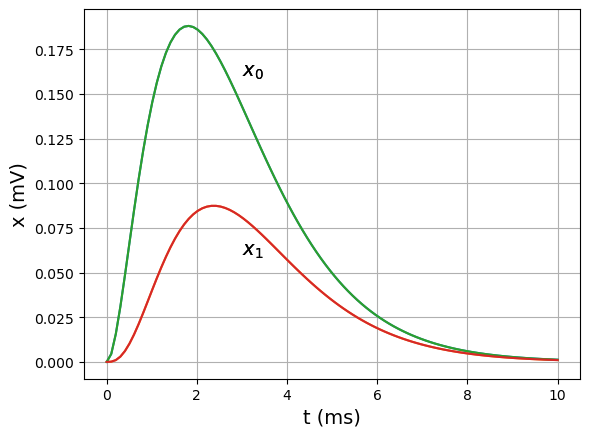

In [9]:
# exact solution of 2-compartment neuron
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10,100)
v1 = (t**2+t-0.5)*np.exp(-t)/4 + np.exp(-3*t)/8
v2 = (t**2-t+0.5)*np.exp(-t)/4 - np.exp(-3*t)/8
plt.plot(t,v1,t,v2,linewidth=1.5)
plt.grid('on')

plt.xlabel('t (ms)',fontsize=14)
plt.ylabel('x (mV)',fontsize=14)
plt.text(3,0.16,'$x_0$',fontsize=14)
plt.text(3,0.06,'$x_1$',fontsize=14)
plt.show();

\begin{myfig}\label{fig:r2exact} Its response, when $R_i=R_m=C_m=1$, to $i_0(t)=t\exp(-t)$, as established in
(\ref{eq:xrc2ex}). \end{myfig}


Contrasting (\ref{eq:xrc2ex}) and (\ref{eq:Reslap}) we see that the two rates of
exponential decay in both $x_1$ and $x_2$ coincide with the two poles of 
$(sI-B)^{-1}$. This matrix, and its poles, are of such central importance to
both dynamics and higher linear algebra that they have been named. In particular,
we call $(sI-B)^{-1}$ the  **resolvent**  of $B$ and we call the poles of the resolvent
the  **eigenvalues**  of $B$. The meaning of this German-English hybrid is better
gleaned from its Spanish equivalent,  *autovalor* . 
This suggests that poles of the resolvent
of $B$ are auto- or self-values of $B$. To see where this notion of self-value
arises, note that if $\la$ is a pole of the resolvent then $(\la I-B)$ has no
inverse. In this case the columns of $(\la I-B)$ are linearly dependent and,
equivalently, $(\la I-B)$ has a nontrivial null space. The latter implies that
there exists and nonzero vector $x$ such that $(\la I-B)x=0$. On rearranging we
find

\begin{equation} \label{eq:eigfirst}
  \boxed{Bx = \la x} 
\end{equation}

and finally arrive at the etymology of  *self* . In particular, in
(\ref{eq:eigfirst}) there are no exogenous stimuli or initial conditions for $B$ to respond to.
The $x$ and $\lambda$ are therefore solely reflections of $B$ itself.  
Moreover, as $Bx$ is simply a scalar multiple of $x$ we call this $x$ a self-vector and the
associated $\la$ and self-value of $B$.
With the words now unpacked we will revert
to their common usage, eigenvalue and eigenvector. 

To take a concrete case we 
find the eigenvectors of the $B$ in (\ref{eq:lap6}) associated with the eigenvalues
$\la_1=-1$ and $\la_2=-3$. If $x_1\in \N(\la_1 I-B)$ then


\begin{equation}
  \begin{bmatrix}1 & -1 \\ -1 & 1\end{bmatrix}
  \begin{bmatrix}x_1(1) \\ x_1(2)\end{bmatrix} \hskip 0.25in\hbox{hence}\hskip 0.25in
  x_1 = a\begin{bmatrix}1 \\ 1\end{bmatrix} \label{eq:eBx1}
\end{equation}


for any $a\in\maR$. Similarly,  If $x_2\in \N(\la_2 I-B)$ then


\begin{equation}
  \begin{bmatrix}-1 & -1 \\ -1 & -1\end{bmatrix}
  \begin{bmatrix}x_2(1) \\ x_2(2)\end{bmatrix} \hskip 0.25in\hbox{hence}\hskip 0.25in
  x_2 = a\begin{bmatrix}1 \\ -1\end{bmatrix} \label{eq:eBx2}
\end{equation}


for any $a\in\maR$.


The connection between
the mysterious representation (\ref{eq:ilap}) and the less mysterious
representation (\ref{eq:godex}) will stem from writing the latter as a convolution
and then noting that the Laplace Transform is especially well-suited to
convolutions. To be precise \index{convolution}
we define the  **convolution**  of two functions $f$ and $g$, defined
for $t>0$, to be


\begin{equation}
  \boxed{(f\star g)(t) = \int_0^t f(t-y)g(y)\,dy.} \label{eq:defconv}
\end{equation}


We will now prove that the Laplace Transform of the convolution of $f$ and $g$ is
simply the product of their Laplace Transforms.


\begin{proposition}\label{prop:Lapcon} If $h(t)=(f\star g)(t)$ then $H(s)=F(s)G(s)$.
\end{proposition}

**Proof:** On taking the Laplace Transform of each side of \eq(\ref{eq:defconv}) we find

\begin{equation*}
  \eqalign{ H(s)
   &= \int_0^\infty\int_0^t f(t-y)g(y)\,dy\,\re^{-st}\,dt  \cr
   &= \int_0^\infty g(y)\re^{-sy} \int_0^\infty f(t-y)\re^{-s(t-y)}\,dt\,dy, \hskip 0.25in
   \hbox{as $g(y)=0$ for $y<0$ and $f(t-y)=0$ for $y>t$} \cr
&= \int_0^\infty g(y) \re^{-sy}\int_0^\infty f(r)\re^{-sr}\,dr\,dy, \hskip 0.25in 
   \hbox{using $r=t-y$ and $f(r)=0$ for $r<0$} \cr
&= F(s)G(s), \cr}
\end{equation*}

as claimed. **End of Proof.**  



On reconciling this result with (\ref{eq:godex} and \ref{eq:lap5}) we arrive at the
conclusion that $(sI-B)^{-1}$ is the Laplace Transform of $\exp(Bt)$. Or, put
the other way round, $\exp(Bt)$ is the inverse Laplace Transform of the resolvent.
That is


\begin{equation}
  \boxed{\exp(Bt) = \frac{1}{2\pi i}\int_C (sI-B)^{-1}\exp(st)\,ds} 
    \label{eq:expvialap}
\end{equation}


where $C$ encloses all of the eigenvalues of $B$. With $B$ and $(sI-B)^{-1}$
as given, (\ref{eq:lap6} and \ref{eq:Reslap}), for our 2-compartment neuron 
Cauchy's Integral Theorem will reveal the concrete


\begin{equation}
  \exp(Bt) = \frac{\exp(-t)}{2}\begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix} +
             \frac{\exp(-3t)}{2}\begin{bmatrix}1 & -1 \\ -1 & 1 \end{bmatrix}.
  \label{eq:eBtn2}
\end{equation}


It is no accident that these two matrices are orthogonal projectors of $\maR^2$ onto the 
respective subspaces spanned by the eigenvectors, $x_1$ and
$x_2$ from (\ref{eq:eBx1}-\ref{eq:eBx2}).

On substition of (\ref{eq:eBtn2}) into (\ref{eq:godex}) with $f(t)=[t\exp(-t)\ 0]^T$ we find


\begin{equation*}
  \eqalign{
  x(t) &= \int_0^t\exp(B(t-y))f(y)\,dy \cr
  &= \begin{bmatrix} 1/2 \\ 1/2 \end{bmatrix}\int_0^t\exp(y-t)y\exp(-y)\,dy +
   \begin{bmatrix} 1/2 \\ -1/2 \end{bmatrix}\int_0^t\exp(3(y-t))y\exp(-y)\,dy \cr
  &= \exp(-t)\begin{bmatrix} 1/2 \\ 1/2 \end{bmatrix}\int_0^t y\,dy +
   \exp(-3t)\begin{bmatrix} 1/2 \\ -1/2 \end{bmatrix}\int_0^t\exp(2y)y\,dy \cr}
\end{equation*}


and so indeed recover (\ref{eq:xrc2ex}).

<!-- \if 1=0  needed?
\centerline{\psfig{figure=c6/fib3_fig1.ps,height=2.5in}}
\figlabel{fib3fig1}
\centerline{\Fig\figref{fib3fig1}. The 3 potentials associated with \fig\figref{dcell4}.}

 The other potentials, see \fig\figref{fib3fig1}, possess similar
expressions. Please note that each of the poles of $\cL x_1$ appear
as exponents in $x_1$ and that the coefficients of the exponentials
are polynomials whose degrees are determined by the  **orders**  of
the respective poles.  *fib3.m*  
\fi -->

\begin{exercise}\label{ex:exp2x2} For matrices with special powers we may sum the
Taylor series, (\ref{eq:eBt}), by hand and arrive at the matrix exponential.
We considered a few such cases in Chapter 1. In particular lets return
to the shear matrices.

(a) Show that if 

\begin{equation*}
  N(\s) = \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix} \hskip 0.25in\hbox{then}\hskip 0.25in
  N(\s)^n = \begin{bmatrix} 1 & n\s \\ 0 & 1 \end{bmatrix}  \hskip 0.25in n=0,1,2,\ldots
\end{equation*}

(b) Use (a) and (\ref{eq:eBt}) to show that

\begin{equation*}
  \exp(N(\s)t) = \exp(t) N(\s t).
\end{equation*}

\end{exercise}

\begin{exercise}\label{ex:expNaP} The class of matrices with the simplest powers are the **nilpotent** matrices.

(a) We call a matrix $B$ nilpotent if $B^m=0$ for some positive integer $m$.
In this case (\ref{eq:eBt}) reduces to a finite sum. Show that

\begin{equation*}
  B=\begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}
\end{equation*}

is nilpotent and use (\ref{eq:eBt}) to show that $\exp(Bt)=N(t)$ is shear by $t$.

(b) The next easiest class is the class of **projection** matrices.
For if $P^2=P$ then $P^k=P$ for every integer $k\ge 1$. Show that if $P^2=P$ then

\begin{equation}
  \exp(Pt) = I-P + \exp(t)P. \label{eq:expPt}
\end{equation}

(c) The next easiest class is the class of weighted sums of
independent projection matrices. For example, show that if

\begin{equation*}
  B = \la_1P_1+\la_2P_2 \where P_1^2=P_1, \hskip 0.25in P_2^2=P_2,\hskip 0.25in P_1P_2=P_2P_1=0, \hskip 0.25in P_1+P_2=I
\end{equation*}

and $\la_1$ and $\la_2$ are scalars then

\begin{equation}
  \exp(Bt) = \exp(\la_1 t)P_1+\exp(\la_2 t)P_2. \label{eq:expP12t}
\end{equation}

Show that (\ref{eq:eBtn2}) is an example of this class by identifying the $\la_j$ and $P_j$.
\end{exercise}

\begin{exercise}\label{ex:convbox} In order to visualize the convolution, (\ref{eq:defconv}), of two
functions let us see that the convolution of two blocks is a trapezoid.
In particular, suppose that $g$ and $f$ are the step functions 
$f(y)=(y>0)(y<1)$ and $g(y)=(y>2)(y<4)$.
Show that $(f\star g)(t)$ is the length of the overlap of the intervals
$(t-1,t)$ and $(2,4)$, as in \fig\figref{convbox}, and so 

\begin{equation*}
  (f\star g)(t) = \begin{cases} 0 & \hbox{if}\hskip 0.25in t\le 2 \\
                                t-2 & \hbox{if}\hskip 0.25in 2\le t\le 3 \\
                                1 & \hbox{if}\hskip 0.25in 3\le t\le 4 \\
                                5-t & \hbox{if}\hskip 0.25in 4\le t\le 5 \\
                                0 & \hbox{if}\hskip 0.25in 5\le t. \end{cases}
\end{equation*}

\end{exercise}

<IPython.core.display.Javascript object>


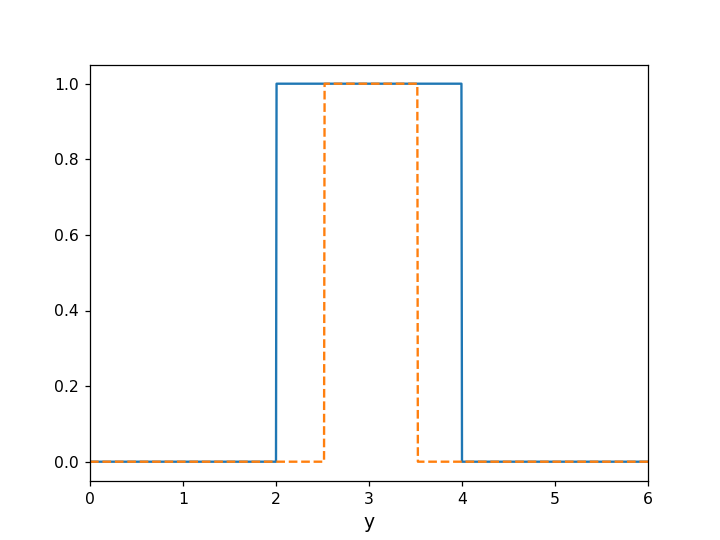

interactive(children=(FloatSlider(value=1.0, description='t', max=6.0, step=0.01), Output()), _dom_classes=('w…

In [36]:
# convolution widget
%matplotlib notebook     
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

def f(y):
    return (y>0)*(y<1)*1

def g(y):
    return (y>2)*(y<4)*1

fig = plt.figure(' ') 

t = 1
y = np.linspace(0,6,1000)
F = f(t-y)
plt.plot(y,g(y))
pF, = plt.plot(y,F,'--')
plt.xlim(0,6)
plt.xlabel('y', fontsize=12)

def update( t=widgets.FloatSlider(min=0, max=6, step=0.01, value=1, description='t') ):
    y = np.linspace(0,6,1000)
    yt = np.linspace(0,t,1000)
    N = 1000
    dy = t/N
    F = f(t-y)
    pF.set_data(y,F)
    c = np.dot(f(t-yt),g(yt))*dy
    print('              c(t) = ', np.round(c,2))
    fig.canvas.draw_idle()

interact(update);

plt.show()

\centerline{\psfig{figure=c6/convboxh.eps,height=2in,width=4in}}
\figlabel{convbox}
\Fig\figref{convbox}. The integrand $f(t-y)g(y)$ for increasing values of $t$. The convolution at each $t$ is the area of the shaded region, of overlap of $g$ and
a shifted copy of $f$.

\begin{exercise}\label{ex:dyn1} Confirm, by hand, the following Laplace transforms 

 (a) If $u(t)=\exp(t)$ then $U(s)=1/(s-1)$.

 (b) If $u(t)=t\exp(-t)$ then $U(s)=1/(s+1)^2$.

 (c) If $u(t)=\sin(t)$ then $U(s)=1/(s^2+1)$. Hint: Integrate by parts twice.
\end{exercise}

\begin{exercise}\label{ex:ebtn2} Confirm that the $B$ matrix in (\ref{eq:lap6}) and its matrix
exponential in (\ref{eq:eBtn2}) obey $(\exp(Bt))' = B\exp(Bt)$.
\end{exercise}

\begin{exercise}\label{ex:eig2x2} Our initial brush with the eigenvalues of the matrix $B$ defined them 
as the poles of the resolvent, $(sI-B)^{-1}$. In other words, as those values of $s$ at
which $(sI-B)$ is not invertible. Recalling our work in \S\subsecref{gelu} it follows
that the eigenvalues of $B$ are precisely those $s$ for which $sI-B$ has a zero pivot.
Recalling the definition of the determinant, \defi\procref{detdef}, 
we note that $\det(sI-B)$ is either plus or minus the product of these pivots and 
hence $s$ is an eigenvalue of $B$ when $\det(sI-B)$=0. 
Let us put this into practice in the 2-by-2 case where

\begin{equation*}
  B = \begin{bmatrix} a & b \\ c & d\end{bmatrix}.
\end{equation*}

(a) Show that $\det(sI-B)=s^2-(a+d)s+ad-bc$.

(b) Show that (a) can be re-expressed as 
$\det(sI-B)=s^2-\tr(B)s+\det(B)$ and hence that the eigenvalues of $B$ are

\begin{equation} \label{eq:lam2b2}
  \la_\pm = \frac{\tr\, B \pm\sqrt{(\tr\,B)^2-4\det\,B}}{2}.
\end{equation}

(c) The expression in (b) permits us to classify the eigenvalues (and therefore
the behavior of the associated dynamical system) by where the point 
$(\det(B),\tr(B))$ lies in the $(d,t)$ plane. 

\centerline{\psfig{figure=c6/eig2x2.eps,width=3in}}
\figlabel{eig2x2}
\Fig\figref{eig2x2}. The coordinate axes and the curve $t^2=4d$ partition the
$(d,t)$ plane into 5 regions that correspond to qualitatively distinct dynamics.

Please show that

In region I, $\la_\pm$ are real and negative.

In region II, $\la_\pm$ are nonreal but in LHP

In region III, $\la_\pm$ are nonreal in RHP

in region IV, $\la_\pm$ are real and positive

In regions V, $\la_\pm$ are real and of different signs.
\end{exercise}

\begin{exercise}\label{ex:filt1} With resistors, capacitors and operational amplifiers we can design
circuits that amplify and attenuate selected bands of input frequencies. Consider the circuit of \fig\figref{filt1}

\centerline{\psfig{figure=c1/filter1.eps,width=3in} \hskip 0.25in
            \psfig{figure=c6/BodeLow.eps,width=3in}}
\figlabel{filt1}
\centerline{\Fig\figref{filt1}. A low pass filter circuit and its Bode plot.}

 (a) From the two current balances, $y_1-y_2=0$ and $y_3+y_4=0$
derive the pair of equations


\begin{equation}
  R_1C_1x'_1(t) = v(t) - x_1(t), \hskip 0.25in x_2(t) = (1+R_3/R_2)x_1(t).
    \label{eq:filt1eq}
\end{equation}


 (b) Note that $\tau\equiv R_1C_1$ has units of time and use
\eq(\ref{eq:rc2x}) to conclude that


\begin{equation*}
  x_1(t) = \exp(-t/\tau)x_1(0) + \frac{1}{\tau}\int_0^t\exp((y-t)/\tau)v(y)\,dy.
\end{equation*}


 (c) Suppose that $x_1(0)=0$ and $v(y) = \sin(2\pi f y)$ and 
conclude that


\begin{equation}
  x_1(t) =
   \frac{\sin(2\pi f t)+2\pi f\tau\{\exp(-t/\tau)-\cos(2\pi f t)\}}
     {1+(2\pi f\tau)^2}.  \label{eq:exactfilt1}
\end{equation}


Note that as the numerator is of order $f$ while the denominator is
of order $f^2$ that the magnitude of $x_1(t)$ will decrease with
increasing frequency. As such we call the circuit of \fig\figref{filt1}
a low pass filter.

 (d) Use \eq(\ref{eq:lapdef}) to take the Laplace Transform of 
\eq(\ref{eq:filt1eq}) (with again $x_1(0)=0$) and show that

\begin{equation*}
  X_2(s) = H(s)V(s) \where H(s) = \frac{1+R_3/R_2}{1+\tau s}.
\end{equation*}

As $H$ is the ratio of transformed output to transformed input we call $H$ the  **transfer function** of the circuit. Transfer functions are best illustrated by **Bode plots**  of gain
 *vs.*  frequency where gain is measured in decibels, abbreviated $dB$. A bel is the base-10 
logarithm of the ratio of output power to input power, and hence a decibel is
${\rm Gain}=10\log_{10}(P_{out}/P_{in})\ dB$. As power in circuits is proportional to the square of 
voltage we find

\begin{equation*}
  {\rm Gain}=10\log_{10}(V^2_{out}/V^2_{in}) = 20\log_{10}(|V_{out}/V_{in}|)\ dB.
\end{equation*}

The Bode plot of our circuit is then the gain of its transfer function for purely imaginary
$s=2\pi i f$. Use $|1+2\pi i f \tau|=\sqrt{1+(2\pi f \tau)^2}$ to show that

\begin{equation*}
  {\rm Gain}(f) \equiv 20\log_{10}|H(2\pi i f)| = 20\log_{10}(1+R_3/R_2) -
   10\log_{10}(1+(2\pi f \tau)^2),
\end{equation*}

and that the concrete choices $R_2=R_3$ and $\tau=1\, ms$
lead to the Bode plot 
of \fig\figref{filt1}(B). \index{Bode plot} To make such logarithmic graph paper in
use  *logspace* instead of *linspace* and *semilogx* instead of *plot*.
\end{exercise}

## Numerical Methods

Where in the previous section we tackled the derivative in (\ref{eq:gode})
via an integral transform we pursue in this section a much simpler strategy,
namely, integrate the derivative exactly and approximate the integral of the
right hand side as a simple sum. 

More precisely, one chooses a small "time step," $\eps$, and replaces the
differential equation (\ref{eq:gode}), for the  *function*  $x(t)$ on some interval $t\in [0,T]$, by a difference 
equation for the *vector* $x_\eps \in \maR^N$ where $N=1+T/\eps$. Here the $n$th element of $x_\eps$ is meant to 
approximate $x$ at time $(n-1)\eps$, i.e., 

\begin{equation*}
  x_\eps[n]\approx x((n-1)\eps).
\end{equation*}

With this notation, on integrating (\ref{eq:gode}) over the time step from $(n-1)\eps$ to $n\eps$ we
find

\begin{equation*}
  \int_{(n-1)\eps}^{n\eps} x'(t)\,dt = x(n\eps)-x((n-1)\eps) 
  = x_\eps(n+1) - x_\eps(n) = \int_{(n-1)\eps}^{n\eps} Bx(t) + g(t)\,dt.
\end{equation*}

We next approximate the integral via a sum involving only values of the
integrand at one or both endpoints, via one of three common choices

\begin{equation}
   \int_{(n-1)\eps}^{n\eps} f(t)\,dt \approx 
    \eps\begin{cases} f((n-1)\eps) & \hbox{Left} \\
                  f(n\eps) & \hbox{Right} \\
                  (f((n-1)\eps)+f(n\eps))/2 & \hbox{Average} \end{cases}
    \label{eq:quadchoice}
\end{equation}

The Left choice leads to $x_\eps(n+1) - x_\eps(n) = \eps Bx_\eps(n) + \eps g((n-1)\eps)$, that is

\begin{equation}
  \boxed{\hbox{Explicit Euler:}\hskip 0.25in x_\eps(n+1) = (I+\eps B)x_\eps(n) + \eps g((n-1)\eps).}
   \label{eq:exEul}
\end{equation}


The Right choice leads to $x_\eps(n+1) - x_\eps(n) = \eps Bx_\eps(n+1) + \eps g(n\eps)$, that is


\begin{equation}
  \boxed{\hbox{Implicit Euler:}\hskip 0.25in (I-\eps B)x_\eps(n+1) = x_\eps(n) + \eps g(n\eps).}
   \label{eq:imEul}
\end{equation}


The Average choice leads to $x_\eps(n+1) - x_\eps(n) = \eps B(x_\eps(n+1)+x_\eps(n))/2 + 
  \eps(g(n\eps)+g((n-1)\eps))/2$, that is
  

\begin{equation}
  \boxed{\hbox{Trapezoid:}\hskip 0.25in (I-(\eps/2)B)x_\eps(n+1) = (I+(\eps/2)B)x_\eps(n) + 
       \eps(g(n\eps)+g((n-1)\eps))/2.} \label{eq:trapEul}
\end{equation}


Each of these provide means to march through time by computing the next
element of $x_\eps$ in terms of its current value. We will implement and study
the Implicit method here and the other two methods in the exercises.

Regarding implementation of (\ref{eq:imEul}) we find


\begin{equation}
  x_\eps(n+1) = (I-\eps B)\backslash (x_\eps(n) + \eps g(n\eps)), \label{eq:backe}
\end{equation}


and code this in  % *cab2.m} for the circuit of \fig\figref{dcell4*  .

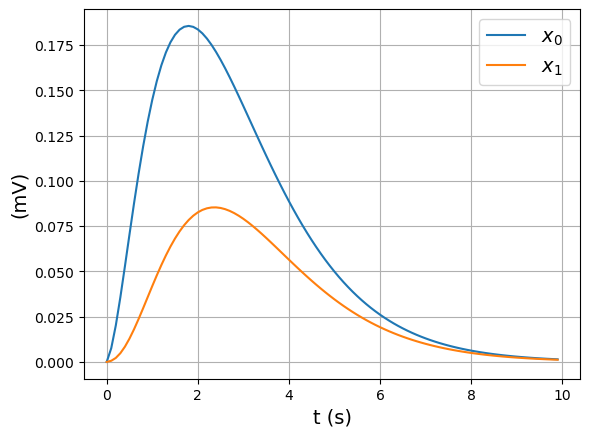

In [29]:
#  Implicit Euler on the 2-compartment neuron

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la          # import linear algebra functions

B = np.array([[-2, 1],[1, -2]])
eps = 0.1
LU, piv = la.lu_factor(np.eye(2)-eps*B)                    # its LU factors

N = int(10/eps)

x = np.zeros((2,N))
t = np.zeros(N)
g = np.zeros(2)
for n in range(1,N):
    t[n] = n*eps
    g[0] = t[n]*np.exp(-t[n])
    x[:,n] = la.lu_solve((LU, piv), x[:,n-1] + eps*g)

plt.plot(t,x[0,:])
plt.plot(t,x[1,:])

plt.xlabel('t (s)', fontsize=14)
plt.ylabel('(mV)', fontsize=14)
plt.grid('on')
plt.legend(['$x_0$','$x_1$'], fontsize=14);
plt.show()

 We compare the performance of this procedure with the exact solution in 
Figure \ref{fig:x1be}. We have chosen large values of $\eps$ for ease of illustration.
You may wish to confirm that the approximation "looks" much better at much smaller
$\eps$.



\centerline{\psfig{figure=c6/x1be.eps,width=3in}}
\figlabel{x1be}
\Fig\figref{x1be}. We contrast the exact solution, $x_1(t)$, in (\ref{eq:xrc2ex}), in black at times $t=(0.25)n$,
with solutions delivered by  *cab2.*   with $\eps=0.5$ (dashed blue) and $\eps=0.25$ (solid blue).



In order to see, mathematically, that the Implicit Euler solution, $x_\eps$, indeed 
approaches the exact solution, $x$, as $\eps\to 0$ lets first
suppose that the stimulus, $g$, is zero. 
In this case, (\ref{eq:backe}) may be written


\begin{equation}
  x_\eps(n) = ((I-\eps B)^{-1})^nx(0). \label{eq:bepow}
\end{equation}


Now, for a fixed time $t$ we suppose that $\eps=t/n$ and ask whether


\begin{equation}
  x(t) = \lim_{n\to \infty}((I-(t/n)B)^{-1})^nx(0). \label{eq:bepow2}
\end{equation}


We will here establish the truth of (\ref{eq:bepow2}) for scalar $B$ and then
return to the matrix case in Chapter \secref{eig}. If $B\in\maR$ and
$n>|Bt|$ then


\begin{equation}
  \eqalign{((I-(t/n)B)^{-1})^n 
  = \left(\frac{1}{1-Bt/n}\right)^n 
  &= \exp(n\log(1/(1-Bt/n))) \cr
  &= \exp(-n\log(1-Bt/n)) \cr
  &= \exp(-n(-Bt/n + O(1/n^2))) \cr
  &\to \exp(Bt)\hskip 0.25in\hbox{as}\ n\to\infty, \cr} \label{eq:bepow3}
\end{equation}


follows from basic properties of $\log$: 
$\log(1/x)=-\log(x)$ and $\log(1-x)=-x+O(x^2)$ where $O(x^2)$ indicates terms
that go to zero at least as fast as $x^2$ when $x\to 0$.

Returning to the question posed in (\ref{eq:bepow2}, we have shown that $x_{t/n})(n)\to \exp(Bt)x(0)$
as $n\to\infty$, when $B$ is scalar and the stimulus is zero. Comparing this with our analytical
findings, (\ref{eq:godex}, we conclude that the approximate solution, $x_{t/n})(n)$, computed by the
Implicit Euler Method, indeed converges to the solution of the dynamical system $x'(t)=Bx(t)$.

At this point we have developed analytical and numerical approaches to differential
equations of the form $x'(t)=Bx(t)+g(t)$. In \S\subsecref{dmeta} we will investigate the
extent to which our analytical approach provide insight into the behavior of solutions to
differential equations of the form 


\begin{equation}
  x'(t)=F(t,x(t)),  \label{eq:odenon}
\end{equation}


where $F$ may be, in general, a nonlinear function of each of its arguments.
We begin the numerical integration of (\ref{eq:odenon}) by applying our Trapezoidal scheme


\begin{equation}
  x_\eps(n+1)-x_\eps(n) = \eps\{F(n\eps,x_\eps(n))+F((n+1)\eps,x_\eps(n+1))\}/2. \label{eq:heun1}
\end{equation}


The difficulty in marching from $x_\eps(n)$ to $x_\eps(n+1)$ is that the latter now appears "inside"
the nonlinear $F$ as the last term in (\ref{eq:heun1}). There are many ways to work our way out from
under this nonlinearity. 
One popular scheme, known as  **Heun's Method}, is to approximate this \index{Heun's Method** 
latter $x_\eps(n+1)$ by with its Explicit Euler update from $x_\eps(n)$. 
That is, to replace (\ref{eq:heun1}) with


\begin{equation}
  \boxed{x_\eps(n+1) = x_\eps(n) + 
     \eps\{F(n\eps,x_\eps(n))+F((n+1)\eps,x_\eps(n)+\eps F((n+1)\eps,x_\eps(n)))\}/2.} \label{eq:heun2}
\end{equation}


We note that this is fully explicit but much more accurate than Explicit Euler.
To code this we need only specify the function $F$, the initial values $x(0)$, the 
final time, $T$, and the timestep, $\eps$.
\begin{verbatim}
     function [t,x] = heun(F,x0,T,eps)
     N = ceil(T/eps);
     m = length(x0);
     x = zeros(m,N);
     x(:,1) = x0;
     t = zeros(1,N);
     for n=2:N
         t(n) = eps*(n-1);
         F1 = F(t(n-1),x(:,n-1));
         F2 = F(t(n),x(:,n-1));
         F3 = F(t(n),x(:,n-1) + eps*F2);
         x(:,n) = x(:,n-1) + eps*(F1 + F3)/2;
     end
     return
\end{verbatim}
We test this on a Goodwin Oscillator


\begin{equation}
   \eqalign{
  x'_1(t) &= \frac{1}{1+x_2(t)} - 1/2 \cr
  x'_2(t) &= x_1(t) - 1 \cr} \label{eq:goodwin}
\end{equation}


with initial values $x(0)=[1;2]$, final time $T=20$ and timestep $\eps=0.01$ via
\begin{verbatim}
     >> [t,x] = heun(@goodwin,[1;2],20,0.01);
     >> plot(t,x(1,:),t,x(2,:))
\end{verbatim}
where  *goodwin*   is encoded as
\begin{verbatim}
     function dx = goodwin(t,x)
     dx(1,1) = 1/(1+x(2)) - 1/2;
     dx(2,1) = x(1) - 1;
     return
\end{verbatim}     
We have plotted both $x_1$ and $x_2$ against $t$ and against one another in
\fig\figref{goodwin}.

\centerline{\psfig{figure=c6/goodwinA.eps,width=3in}\hskip 0.25in
            \psfig{figure=c6/goodwinB.eps,width=3in}}
\figlabel{goodwin}
 \Fig\figref{goodwin}. Solutions of the Goodwin Oscillator, (\ref{eq:goodwin}),
via Heun's Method.
(A) The two elements of $x$  *vs.*  time.
(B) The trajectory $(x_1(t),x_2(t))$ produces a closed curve as $t$ increases.



The closed curve in the $(x_1,x_2)$ plane in \fig\figref{goodwin}(B) encircles the steady state
solution $x_1=x_2=1$ to (\ref{eq:goodwin}). This curve is in fact uniquely prescibed by the choice
of initial data. You are encouraged to experiment with both smaller and larger values.

\begin{exercise}\label{ex:LRA} Regarding the errors produced in the integral 
approximations (\ref{eq:quadchoice}), show

 (a) If $f$ is constant then the three choices agree and are exact.

 (b) If $f$ is linear, e.g., $f(t)=1+t$, then the three choices give three distinct values
and that the average choice is exact.
\end{exercise}

\begin{exercise}\label{ex:bepowstim} We return to the Implicit Euler scheme and show that $x_{t/n}(n)\to x(t)$
even with a stimulus.

 (a) If $g\ne 0$ then argue that (\ref{eq:bepow}) takes the form
 

\begin{equation*}
  x_\eps(n) = ((I-\eps B)^{-1})^n\left(x(0) + 
   \eps\sum_{k=1}^n(I-\eps B)^{k-1}g(k\eps)\right).
\end{equation*}


Again setting $\eps=t/n$ we arrive at


\begin{equation*}
  x_{t/n}(n) = ((I-(t/n)B)^{-1})^n\left(x(0) + (t/n)
  \sum_{k=1}^j(I-tB/n)^{k-1}g(kt/n)\right).
\end{equation*}


(b) Argue as in (\ref{eq:bepow3}) that the coefficients of the $g$ terms above obey


\begin{equation}
   (I-(t/n)B)^{k-1} = \exp(-B(kt/n)) + O(1/n), \label{eq:expgapp}
\end{equation}


and so arrive at


\begin{equation*}
  x_{t/n}(n) = ((I-(t/n)B)^{-1})^n\left(x(0) + 
   \frac{t}{n}\sum_{k=1}^n\exp(-Btk/n)g(tk/n) +
      O(1/n)\frac{t}{n}\sum_{k=1}^n g(tk/n)\right). 
\end{equation*}


(c) Explain why

\begin{equation*}
  \lim_{n\to\infty}(t/n)\sum_{k=1}^n g(tk/n) = \int_0^t g(y)\,dy
\end{equation*}


and


\begin{equation*}
  \lim_{n\to\infty}(t/n)\sum_{k=1}^n \exp(-Btk/n)g(tk/n) 
   = \int_0^t \exp(-By)g(y)\,dy,
\end{equation*}


and finally that $x_{t/n}(n)\to x(t)$ where $x$ is the solution of (\ref{eq:godex}).
\end{exercise}

\begin{exercise}\label{ex:dyn4} Adapt the Backward Euler portion of  *fib3.m*   so that one
may specify an arbitrary number of compartments, as in  *fib1.m*  .
As $B$, and so $S$, is now large and sparse please create the sparse $B$
via  *spdiags* and the sparse $I$ via *speye*  , and then prefactor
$S$ into $LU$ and use $U\backslash L\backslash$ rather than
$S\backslash$ in the time loop. Experiment to find the proper choice of $dt$.
Submit your well documented M-file along with a plot of $x_1$ and $x_{50}$
 *versus*  time (on the same well labeled graph) for a 100 compartment
cable. 
\end{exercise}

%\begin{exercise}\label{ex:dyn5} Derive (\ref{eq:power} from \Eqref{backe}) by working backwards
%toward $x(0)$. Along the way you should explain why
%$(I/dt-B)^{-1}/dt=(I-\eps B)^{-1}$.

%\begin{exercise}\label{ex:dyn6} Show, for $b\in\maR$, that 
%
%\begin{equation*}
%  \exp(bt) = \lim_{j\to\infty}\left(\frac{1}{1-(t/j)b}\right)^j
%\end{equation*}
%
%Hint: By definition
%
%\begin{equation*}
%  ((1-(t/j)b)^{-1})^j = \exp(j\log(1/(1-(t/j)b)))
%\end{equation*}
%
%now use L'H\^opital's rule to show that $j\log(1/(1-(t/j)b))\to bt$.

\begin{exercise}\label{ex:cablepde} As with our earlier, static neuron. We write Neuron Equation (\ref{eq:ode1}) as


\begin{equation*}
  C_mx'(t) + (1/R_i)Sx(t) + (1/R_m)x(t) = f(t)
\end{equation*}


and pass to the limit of many compartments to find


\begin{equation*}
  C_m\frac{\p x(z,t)}{\p t} + \frac{1}{R_i}\frac{\p^2 x(z,t)}{\p z^2}
  + G_mx(z,t) = 0
\end{equation*}


\end{exercise}

## Dynamics of Mechanical Networks

Regarding the mechanical networks of Chapter \secref{mech}, we may move from the 
equilibrium
equations, 


\begin{equation*}
  Sx = f, \where S =  A^TKA,
\end{equation*}


for the displacement $x$ due to a constant force, $f$,
to the dynamical equations for the displacement, $x(t)$, due to 
a time varying force, $f(t)$, and/or nonequilibrium initial conditions,
by simply appending the Newtonian inertial terms. That is,


\begin{equation}
  Mx"(t) + Sx(t) = f(t), \hskip 0.25in x(0)=x_0,\hskip 0.25in x'(0)=v_0, \label{eq:msd}
\end{equation}


where $M$ is the diagonal matrix of node masses, $x_0$ denotes their
initial displacement and $v_0$ denotes their initial velocity.
We transform this system of second order differential equations to an
equivalent first order system by introducing


\begin{equation*}
  u_1 \equiv x \and u_2 \equiv  u'_1
\end{equation*}


and then noting that (\ref{eq:msd}) takes the form


\begin{equation*}
  u'_2 = x" = -M^{-1}Su_1 + M^{-1}f(t).
\end{equation*}


As such, we find that $u=(u_1\ u_2)^T$ obeys the familiar


\begin{equation}
  u' = Bu + g, \hskip 0.25in u(0)=u_0		\label{eq:newt}
\end{equation}


where


\begin{equation}
  B = \begin{bmatrix}0 & I \cr -M^{-1}S & 0\end{bmatrix}, \hskip 0.25in
  g = \begin{bmatrix}0 \cr M^{-1}f\end{bmatrix}, \hskip 0.25in  
  u_0 = \begin{bmatrix}x_0 \cr v_0\end{bmatrix}. \label{eq:newt2}
\end{equation}


**Example 1**, The Harmonic Oscillator: As our first example of \ref{eq:newt2}  we consider,
see \fig\figref{ms1}, a
single mass, of mass $m$, suspended by a single spring, of stiffness $k$. In
this case \index{harmonic oscillator}


\begin{equation}
  B = \begin{bmatrix}0 & 1 \cr -\om^2 & 0\end{bmatrix} \label{eq:Bonemass}
\end{equation}


where $\om^2=k/m$. 



\centerline{\psfig{figure=c2/ms1A.eps,width=3in} \hskip 0.25in
            \psfig{figure=c2/ms1B.eps,width=3in}}
\figlabel{ms1}
 \Fig\figref{ms1}. (A) A single mass suspended from a single spring.
(B) The response of the mass to a driving force $\sin(at)$ as
derived in (\ref{eq:ms1x} and \Eqref{ms1xres}).



Via Gauss-Jordan or (\ref{eq:inv2}) we find that


\begin{equation}
  (sI-B)^{-1} = \frac{1}{s^2+\om^2} \begin{bmatrix} s & 1 \\ -\om^2 & s \end{bmatrix}  \label{eq:BonemassRes}
\end{equation}


has poles at $\pm i\om$ where $i\equiv\sqrt{-1}$ is the imaginary unit. 
Invoking (\ref{eq:expvialap}) (will) then bring


\begin{equation}
  \exp(Bt) = \frac{\exp(i\om t)}{2i\om}\begin{bmatrix} i\om & 1 \\ -\om^2 & i\om\end{bmatrix}
     - \frac{\exp(-i\om t)}{2i\om}\begin{bmatrix} -i\om & 1 \\ -\om^2 & -i\om \end{bmatrix} = \begin{bmatrix} \cos(\om t) & \sin(\om t)/\om \\ -\om\sin(\om t) & \cos(\om t) \end{bmatrix} \label{eq:BonemassExp}
\end{equation}


Thanks to the beautiful identities


\begin{equation}
  \cos(\om t) = \frac{\exp(i\om t)+\exp(-i\om t)}{2} \and
  \sin(\om t) = \frac{\exp(i\om t)-\exp(-i\om t)}{2i} \label{eq:preEuler}
\end{equation}


to be proven in the next chapter. In the unloaded case, $f=0$, with initial displacement, $x_0$, and
velocity, $v_0$, it follows that the displacement is


\begin{equation}
  x(t)=x_0\cos(\om t) + (v_0/\omega)\sin(\om t). \label{eq:Harmxfree}
\end{equation}


Conversely,
with no initial displacement or velocity but with driving force $f(t)=\sin(at)$ we find


\begin{equation}
  x(t) = \frac{1}{m\om}\int_0^t\sin(\om y)\sin(a(t-y))\,dy =
   \frac{\sin(\om t)-\sin(at)}{2m\om(a-\om)} +
   \frac{\sin(\om t)-\sin(at)}{2m\om(a+\om)}. \label{eq:ms1x}
\end{equation}


From this we see that as the driving frequency, $a$, approaches $\om$ the
displacement approaches


\begin{equation}
  x(t) = \frac{\sin(\om t)}{2m\om^2} - \frac{t\cos(\om t)}{2m\om}. 
    \label{eq:ms1xres}
\end{equation}


As the amplitude of this displacement grows with time we speak of $\om$ as
the  **resonant frequency** of our system. \index{resonant frequency} 
It is no accident that the resonant frequency is the imaginary part of the
eigenvalue of the associated $B$ matrix, (\ref{eq:Bonemass}). 
We have illustrated this phenomenon in \fig\figref{ms1}(B).

\bigskip

**Example 2:**  For our second example 
we consider the chain of 2 masses in \fig\figref{ms2}(A). 
If each node has mass $m$ and each spring has stiffness $k$ then


\begin{equation*}
  M^{-1}S = \om^2\begin{bmatrix}2 & -1 \cr -1 & 2\end{bmatrix}
  \hskip 0.25in\hbox{and hence}\hskip 0.25in
  B = \begin{bmatrix} 0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\
              -2\om^2 & \om^2 & 0 & 0 \\ \om^2 & -2\om^2 & 0 & 0 \end{bmatrix}
\end{equation*}


and so, 


\begin{equation*}
  (sI-B)^{-1} = {\small \frac{1}{(s^2+\om^2)(s^2+3\om^2)}
    \begin{bmatrix} s(s^2+2\om^2) & s\om^2 & s^2+2\om^2 & \om^2 \\
                 s\om^2 & s(s^2+2\om^2) & \om^2 & s^2+2\om^2 \\
                -\om^2(2s^2+3\om^2) & s^2\om^2 & s(s^2+2\om^2) & s\om^2 \\
              s^2\om^2 & -\om^2(2s^2+3\om^2) & s\om^2 & s(s^2+2\om^2) \end{bmatrix}}.
\end{equation*}


We did not compute this by hand via Gauss-Jordan but rather invoked the 
symbolic toolbox in \Matlab. In particular, 



{\tt >> syms s

>> inv(s*eye(4)-B)}



 does the job.  We see that this resolvent has poles at
$\pm i\om$ and $\pm i\om\sqrt 3$
and that they appear explicitly in the associated matrix exponential
<!-- \if 1=0 % full monty

\begin{equation*}
   \eqalign{
  \exp(Bt) &= {\small \frac{\exp(i\om t)}{4}\begin{bmatrix}
   1 &   1 & -i/\om & -i/\om \\ 1 &  1 & -i/\om & -i/\om \\
  i\om & i\om & 1 &  1 \\ i\om & i\om & 1 &  1 \end{bmatrix}
  + \frac{\exp(-i\om t)}{4}\begin{bmatrix}
   1 &   1 & i/\om & i/\om \\ 1 &  1 & i/\om & i/\om \\
  -i\om & -i\om & 1 &  1 \\ -i\om & -i\om & 1 &  1 \end{bmatrix}} \cr
  &\hskip 0.25in + {\small \frac{\exp(i\om\sqrt 3 t)}{4}\begin{bmatrix}
   1 &  -1 & -i/(\om\sqrt 3) & i/(\om\sqrt 3) \\
   -1 &  1 & i/(\om\sqrt 3) & -i/(\om\sqrt 3) \\
   i\om\sqrt 3 & -i\om\sqrt 3 & 1 & -1 \\
   -i\om\sqrt 3 & i\om\sqrt 3 & -1 & 1 \end{bmatrix}
+ \frac{\exp(-i\om\sqrt 3 t)}{4}\begin{bmatrix}
   1 &  -1 & i/(\om\sqrt 3) & -i/(\om\sqrt 3) \\
   -1 &  1 & -i/(\om\sqrt 3) & i/(\om\sqrt 3) \\
   -i\om\sqrt 3 & i\om\sqrt 3 & 1 & -1 \\
   i\om\sqrt 3 & -i\om\sqrt 3 & -1 & 1 \end{bmatrix}} \cr}
\end{equation*}

\fi -->


\begin{equation*}
   \eqalign{
  \exp(Bt) &=  {\small \frac{1}{2}\begin{bmatrix}
   \cos(\om t) &   \cos(\om t) & \sin(\om t)/\om & \sin(\om t)/\om \\ 
   \cos(\om t) &  \cos(\om t) & \sin(\om t)/\om & \sin(\om t)/\om \\
  -\om\sin(\om t) & -\om\sin(\om t) & \cos(\om t) & \cos(\om t) \\ 
  -\om\sin(\om t) & -\om\sin(\om t) & \cos(\om t) & \cos(\om t) \end{bmatrix}} \cr
   &+  {\small \frac{1}{2}\begin{bmatrix}
   \cos(\om\sqt t) &   -\cos(\om\sqt t) & \sin(\om\sqt t)/(\om\sqt) & -\sin(\om\sqt t)/(\om\sqt) \\ 
   -\cos(\om\sqt t) &  \cos(\om\sqt t) & -\sin(\om\sqt t)/(\om\sqt) & \sin(\om\sqt t)/(\om\sqt) \\
  -\om\sqt\sin(\om\sqt t) & \om\sqt\sin(\om\sqt t) & \cos(\om\sqt t) & -\cos(\om\sqt t) \\ 
  \om\sqt\sin(\om\sqt t) & -\om\sqt\sin(\om\sqt t) & -\cos(\om\sqt t) & \cos(\om\sqt t) \end{bmatrix}} \cr}
\end{equation*}


Hence, if $f(t)=\sin(at)[u_1\ u_2]^T$ then


\begin{equation}
  \eqalign{
  x_1(t) &= \frac{((a/\om)\sin(\om t)-\sin(at))(u_1 + u_2)}{2(a^2-\om^2)} + 
    \frac{((a/\sqt\om)\sin(\sqt\om t)-\sin(at))(u_1 - u_2)}{2(a^2 - 3\om^2)} \cr
  x_2(t) &= \frac{((a/\om)\sin(\om t)-\sin(at))(u_1 + u_2)}{2(a^2 - \om^2)} 
   - \frac{((a/\sqt\om)\sin(\sqt\om t)-\sin(at))(u_1-u_2)}{2(a^2 - 3\om^2)}. \cr}
  \label{eq:ms2x}
\end{equation}


Contrasting this response with that of the single mass system, (\ref{eq:ms1x}),
we see that the two-mass system has two distinct  **modes of vibration** .
Namely, if $u_1=u_2$ then $x_1(t)=x_2(t)$ while if $u_1=-u_2$ then
$x_1(t)=-x_2(t)$. In general the response is a mixture of these two modes,
see, e.g., \fig\figref{ms2}(B), where $a=2$ and $u=[1\ 0]^T$. With this same
$u$ we illustrate in \fig\figref{ms2}(C and D) resonance at $a=\om$ and
$a=\sqt\om$. As in the one-mass example, the resonant frequencies of the mechanical
network are precisely the imaginary parts of the eigenvalues of the 
associated $B$ matrix.



\centerline{\psfig{figure=c2/ms2A.eps,width=3in}\hskip 0.25in
            \psfig{figure=c2/ms2B.eps,width=3in}}
\centerline{\psfig{figure=c2/ms2C.eps,width=3in}\hskip 0.25in
            \psfig{figure=c2/ms2D.eps,width=3in}}
\figlabel{ms2}
 \Fig\figref{ms2}. (A) The two-mass, two-spring network.
(B) The displacements of the 2 masses, 
with $k/m=1=\om^2$ and driving force $f(t)=\sin(at)[1\ 0]^T$ and $a=2$.
(C) The displacements for the same conditions as in (B) except $a=1$.
(D) The displacements for the same conditions as in (B) except $a=\sqt$.
 *ms2.m*  



We note that Implicit Euler is just as useful here as in the
circuit case. In particular, changing the system and stimulus in  *cab2.m*  
brings
\begin{verbatim}
   % chain2.m
   S = [2 -1;-1 2];
   B = [zeros(2) eye(2); -S zeros(2)];
   eps = 0.0001;
   N = ceil(40/eps);
   [L,U] = lu(eye(4)-eps*B);
   x = zeros(4,N);
   t = zeros(1,N);
   for n=2:N,
       t(n) = (n-1)*eps;
       g = [0; 0; sin(2*t(n)); 0];
       x(:,n) = L\(U\(x(:,n-1) + eps*g));
   end
   plot(t,x(1:2,:))
\end{verbatim}



 This code indeed replicates \fig\figref{ms2}(B), although with
significantly greater effort (as measured by the timestep $\eps$) than that
required of  *cab2.m*  .



%Kinetic and Potential Energy (in preparation for Quantum) via Hamiltonian.

**Hamiltonian formulation**. We will have cause to exercise Hamilton's Formulation of Newton's Law, $F=ma$. In the absense of external forces, we identified in \S\subsecref{minprin}  the
potential energy (in the springs) with $(1/2)x^TSx$. The classical kinetic energy is half the product of mass and the square of velocity, i.e., $(1/2)x'^TMx'$. Their sum,
Hamiltonian \index{Hamiltonian} 


\begin{equation*}
  (1/2)x'^TMx'+ (1/2)x^TSx
\end{equation*}


the total energy, is typically represented in terms of position, $x$, and momentum, $p=Mx'$,
as the  **Hamiltonia**, \index{Hamiltonian}


\begin{equation*}
  H(p,x) = (1/2)p^TM^{-1}p + (1/2)x^TSx.
\end{equation*} 
 

Using $Mx"+Sx=0$ we find that time derivatives of our position and momentum variables,


\begin{equation*}
  x' = M^{-1}p = \nabla_p H(p,x) \and
  p' = Mx" = -Sx = -\nabla_x H(p,x)
\end{equation*}


are gradients of the Hamiltonian with respect to momentum and (opposite) position variables.
As such, the time derivative of the Hamiltonian,


\begin{equation*}
  (d/dt)H(p,x) = \nabla_p H(p,x)\cdot p' + \nabla_x H(p,x)\cdot x' = x'\cdot p' - p'\cdot x' = 0,
\end{equation*}


that is, the Hamiltonian is constant on trajectories.


To take a concrete case we revisit the harmonic oscillator of \fig\figref{ms1}  and find the Hamiltonian


\begin{equation}
  H= \frac{p^2}{2m} + \frac{kx^2}{2}   \label{eq:HamHO}
\end{equation}


A choice of initial conditions, $x(0)=x_0$ and $p(0)=p_0$, now fixes the Hamiltonian at $H_0=H(p_0,x_0)$ and so
$p(t)$ and $x(t)$ must evolve according to


\begin{equation*}
  \frac{p^2(t)}{2m} + \frac{kx^2(t)}{2}  = H_0.
\end{equation*}


This traces, in the $(x,p)$ plane, an ellipse centered at $(0,0)$ with width and height,


\begin{equation*}
  \sqrt{2k/H_0} \and \sqrt{2/(mH_0)}
\end{equation*}


respectively.



**Example: The Rutherford Atom** . 
%problem 7 page 356 of Bohm, classical radiation
Let $x$ denote the position in $\maR^3$ of an
electron of charge $-e$ and mass $m$ orbiting a fixed proton of charge $e$. By Coulomb's Law, the force on the electron is 


\begin{equation}
  F =\frac{-e^2 x}{\|x\|^3} \where e^2 = \frac{q_e^2}{4\pi\eps_0}  = 2.3008\times 10^{-28}\ N\,m^2\label{eq:Coulomb}
\end{equation}


captures the charge


\begin{equation*}
 q_e = 1.602\time 10^{-19}\ C
\end{equation*}


on the electron's charge and


\begin{equation*}
  \eps_0=8.85418782\time 10^{-12}\ C^2/(N\,m^2),
\end{equation*}


is the permittivity of free space. Newton's Equations therefore take the form


\begin{equation*}
  x" = -k\frac{x}{\|x\|^3}, \where k \equiv  e^2/m.
\end{equation*}


Check the planar circular orbits, 


\begin{equation}
  x(t) = (r\cos(\omega t), r\sin(\omega t), 0) \where \omega = \sqrt{k/r^3}.  \label{eq:Ruthx}
\end{equation}


This force is conservative in that it is the gradient of the potential


\begin{equation}
  F = -\nabla V \where V(x) = \frac{-e^2}{\|x\|}  \label{eq:RuthV}
\end{equation}


Hence the Hamiltonian


\begin{equation}
  H(p,x) = \frac{1}{2m}\|p\|^2 + V(x).  \label{eq:HamBohm1}
\end{equation}


Show that $H=-e^2/r$ on the circular orbit. So energy decreases, becomes more negative, as radius decreases.

It was known (Larmor Formula) that accelerating charges radiate energy at the same frequency in which they revolve. 
Hence, our electron's energy will grow more negative
and so its radius will decrease, and along the way we will see a radiation at a continuously changing frequency. This
contradicts the facts of stable atoms that radiate only when excited and then only at distinct (discrete) frequencies.

% pass to the limit and get string equation in exercises

\begin{exercise}\label{ex:eveconemass} Find the eigenvectors, by hand, of the $B$ matrix, (\ref{eq:Bonemass}),
associated with the single vibrating mass. The eigenvalues are $\pm i\om$ and so
you must find the two null spaces $\N(\pm\om I-B)$.
\end{exercise}

\begin{exercise}\label{ex:LeastAction} As equilibrium is characterized by minimum potential energy, 
dynamics are determined my minimum action. With potential energy $U$ and kinetic energy 
$T$ the  **Action**  associated with an admissible displacement, $x$, is

\begin{equation*}
  \cA(x) = \int_{t_0}^{t_1} \{T(\dot x(t)) - U(x(t))\}\,dt
\end{equation*}

Show that

\begin{equation*}
  \ip{\cA'(x)}{y} \equiv \lim_{\eps\to 0} \frac{\cA(x+\eps y)-\cA(x)}{\eps}
   = \int_{t_0}^{t_1} \{T'(\dot x(t))\dot y(t) - U'(x(t))y(t)\}\,dt
\end{equation*}

Next, integrate the first term by parts and arrive at

\begin{equation*}
  \ip{\cA'(x)}{y} = -\int_{t_0}^{t_1} \{(d/dt)T'(\dot x(t))+U'(x(t))\}y(t)\,dt
\end{equation*}

Argue that if $x$ yields the Least Action then $\ip{\cA'(x)}{y} = 0$ for each $y$ and that 
this in turn implies that 

\begin{equation*}
 (d/dt)T'(\dot x(t))+U'(x(t)) = 0.
\end{equation*}

When $T(p) = (1/2)p^TMp$ and $U(q)=(1/2)q^TSq$ then we find

\begin{equation*}
  M\ddot x + S x = 0.
\end{equation*}

\end{exercise}



\begin{exercise}\label{ex:CHOdensity} The classical harmonic oscillator  moves like

\begin{equation*}
  x(t) = x_0\cos(\om t) + (v_0/\om)\sin(\om t).
\end{equation*}

We wish to ascertain the fraction, $\rho_A(y)$, of a period, $2\pi/\om$, that the amplitude of $x(t)$ spends near a value $y$.

 (a) First write $x(t)$ in terms of it's amplitude, $A_0$, and phase, $\phi$;

\begin{equation}
   x(t) = A_0\cos(\om t-\phi) \where A_0^2 = x_0^2+(v_0/\om)^2, \hskip 0.25in \phi = \tan^{-1}(v_0/(x_0\om)). \label{eq:AmpPhs}
\end{equation}

Next relate the amplitude to the energy, or Hamiltonian,

\begin{equation*}
  H_0 = \frac{mv_0^2}{2} + \frac{kx_0^2}{2},
\end{equation*}

by showing that

\begin{equation}
   2H_0 = kA_0^2.  \label{eq:AHrelCHO}
\end{equation}

(b) Show that $\rho_A(y)$ is defined by $\rho_A(y)2dy = |T(y)|/(2\pi/\om)$ where $T(y)$ is the time interval

\begin{equation*}
  T(y) = \{t\in[0,2\pi/\om]:y - dy \le x(t)\le y+dy\}.
\end{equation*}

(c) Show that $|T(y)|=0$ for $|y|>A_0$ and that for $|y|<A_0$ that

\begin{equation*}
  |T(y)| = \frac{2}{\om}\left(\cos^{-1}((y-dy)/A_0)-\cos^{-1}((y+dy)/A_0)\right)
\end{equation*}

and deduce that

\begin{equation*}
  \rho_A(y) = -\frac{1}{\pi}\frac{\cos^{-1}((y+dy)/A_0)-\cos^{-1}((y-dy)/A_0)}{2 dy}.
\end{equation*}

(d) Let $dy\to 0$ and arrive at the density

\begin{equation}
  \rho_A(y) = \frac{1}{A_0\pi}\frac{1}{\sqrt{1-(y/A_0)^2}}.  \label{eq:CHOden}
\end{equation}

(e) Confirm that

\begin{equation*}
  \int_{-A_0}^{A_0} \rho_A(y)\,dy = 1.
\end{equation*}

\end{exercise}

\begin{exercise}\label{ex:StatMechCHO} Confirm that the density functional, \Eqrfe{rhoharm}, of the Harmonic Oscillator indeed satisfies the
associated Liouville equation, (\ref{eq:LioCHO}).
\end{exercise}

%Check
%
%\begin{equation*}
%  \frac{\p\rho}{\p t} = \frac{\p \rho_0}{\p x}(-\om x \sin(\om t) - (p/m) \cos(\om t)) +
%  \frac{\p \rho_0}{\p p}(\om^2 x \cos(\om t) - (\om p/m) \sin(\om t)) 
%\end{equation*}
%
%while
%
%\begin{equation*}
% k x\frac{\p\rho}{\p p} = \frac{-kx}{m\om}\frac{\p \rho_0}{\p x}\sin(\om t) +
%  \frac{kx}{m}\frac{\p \rho_0}{\p p}\cos(\om t)
%\end{equation*}
%
%and
%
%\begin{equation*}
%  \frac{p}{m}\frac{\p\rho}{\p x} = \frac{p}{m}\frac{\p \rho_0}{\p x}\cos(\om t) +
%  \frac{p\om}{m}\frac{\p \rho_0}{\p p}\sin(\om t)
%\end{equation*}
%
%This checks on recalling $\om^2=k/m$.

\begin{exercise}\label{ex:dyn7} The restoring force of a viscous damper is proportional
to the velocity of the attached mass. In the notation of \fig\figref{ms1d}(A)
this reads $y_d(t)=dx'(t)$ and so force balance takes the form

\begin{equation*}
  mx"(t) + dx'(t) + kx(t) = f(t).
\end{equation*}


\centerline{\psfig{figure=c2/ms1dA.eps,width=3in}\hskip 0.25in
            \psfig{figure=c2/ms1dB.eps,width=3in}}
\figlabel{ms1d}
\Fig\figref{ms1d}. (A) One mass attached to a spring and a damper.
(B) The response of the system to the initial disturbance $x(0)=1$, $x'(0)=0$
when $k/m$ and $d/m$ is either the under-, over-, or critically damped
regime.



(a) Express this as a first order system, $u'=Bu+g$.

 (b) Show that

\begin{equation}
  (sI-B)^{-1} = \frac{1}{s^2+(d/m)s+(k/m)}\begin{bmatrix} s+d/m & 1 \\
      -k/m & s\end{bmatrix} \label{eq:kmdres}
\end{equation}


 (c) Show that the poles of $(sI-B)^{-1}$ are at

\begin{equation*}
  \la_{\pm}\equiv \frac{-d\pm\sqrt{d^2-4km}}{2m}.
\end{equation*}

Note that these are real and distinct when $d^2>4km$, real and coincident
when $d^2=4km$, and nonreal and distinct when $d^2<4km$. We will see that
these three scenarios lead to distinctly different responses.

 (d) Show that if $d^2\ne 4km$ then

\begin{equation*}
  \exp(Bt) = \frac{\exp(\la_+t)}{\la_+-\la_-}\begin{bmatrix} \la_++d/m & 1\\
               -k/m & \la_+ \end{bmatrix} +
     \frac{\exp(\la_-t)}{\la_-\la_+}\begin{bmatrix} \la_-+d/m & 1\\
               -k/m & \la_- \end{bmatrix}
\end{equation*}

satisfies $(\exp(Bt))'=B\exp(Bt)$.

 (e) Use $u(t)=\exp(Bt)u(0)$ to show that if $u(0)=[1\ 0]^T$ then

\begin{equation}
  \eqalign{
  x(t) &= \frac{\exp(\la_+t)(\la_++d/m)}{\la_+-\la_-} +
         \frac{\exp(\la_-t)(\la_-+d/m)}{\la_-\la_+} \cr
  &= \exp(-dt/(2m))\{\cosh(\delta t/(2m)) + (d/\delta)\sinh(\delta t/(2m))\} \cr}
  \label{eq:xnoncrit}
\end{equation}

where $\delta \equiv \sqrt{d^2-4km}$.

 (f) If $d^2>4km$ then $\delta>0$ and the system is 
called  **overdamped** because the $x$ in \ref{eq:xnoncrit}  decays to
zero without oscillation. For example, if $k/m=1$ and $d/m=3$ then

\begin{equation*}
  x(t) = \exp(-3t/2)(\cosh(\sqrt 5 t/2) + 3\sinh(\sqrt 5 t/2)/\sqrt 5)
\end{equation*}


 (g) If $d^2<4km$ then $\delta=i2m\omega_d$ where 
$\omega_d\equiv\sqrt{4km-d^2}/2m$ and the system is 
called  **underdamped** because the $x$ in \ref{eq:xnoncrit}  oscillates as it
decays to zero. To understand this we unpack

\begin{equation*}
  \cosh(\delta t/(2m)) = \cosh(i\om_d t) = 
   \frac{\exp(i\om_d t)+\exp(-i\om_d t)}{2} = \cos(\om_d t)
\end{equation*}

and similarly for $\sinh$ and so arrive at

\begin{equation*}
  x(t) = \exp(-dt/(2m))(\cos(\om_d t) + d\sin(\om_dt)/\delta).
\end{equation*}

Show that the natural frequency, $\om_d$, of the underdamped system is
less that the natural frequency, $\om=\sqrt{k/m}$, of the undamped system.
For example, if $k/m=1$ and $d/m=1$ then

\begin{equation*}
  x(t) = \exp(-t/2)(\cos(\sqrt 3 t/2) + \sin(\sqrt 3 t/2)/\sqrt 3).
\end{equation*}


 (h) Finally, if $d^2=4km$ we call the system  **critically damped** .
Rather than working all the way back through a new $\exp(Bt)$, simply let
$\delta\to 0$ in (\ref{eq:xnoncrit}) to arrive at

\begin{equation*}
  x(t) = \exp(-dt/(2m))(1 + dt/(2m)).
\end{equation*}

For example, if $k/m=1$ and $d/m=2$ then

\begin{equation*}
  x(t) = \exp(-t)(1+t).
\end{equation*}

\end{exercise}

<!-- \if 1=0   % old too large example


\centerline{\psfig{figure=c2/dchainfig.ps,height=1.25in}}
\figlabel{dchainfig}
\centerline{\Fig\figref{dchainfig}. A damped chain.}



 then the dynamical system (\ref{eq:newt}) takes the form

\begin{equation}
  Mx"(t) + Dx'(t) + Sx(t) = f(t) \label{eq:dnewt}
\end{equation}

where $D=A^T{\rm diag}(d)A$ where $d$ is the vector of damping constants.
Modify  *chain.m*   to solve this new system and use your code to
reproduce \fig\figref{dchain}

\centerline{\psfig{figure=c6/dchain.ps,width=3in}}
\figlabel{dchain}
 \Fig\figref{dchain}. The displacement of the three masses 
in the weakly damped chain, where $k/m=1$ and $d/m=1/10$.
\fi -->


## Dynamics of Metabolic Networks*

We recall the steady state state flux balance $Sv=f$ is the rest state of

\begin{equation}
  m'(t) = Sv-f \label{eq:dmet0}
\end{equation}

where to "close" this system we must express $v$ as a function of
$m$. This field is highly complex and there is nothing as clean as the
early phases of the Strang Quartet, i.e., we may not expect $v=DS^Tm$
for some diagonal matrix $D$. Rather each $v_j(m)$ is typically a
distinct nonlinear function of the associated metabolite concentrations.

To begin we consider the interaction of two metabolites via

\begin{equation*}
  \eqalign{
  &\to m_1 \hskip 0.25in\hbox{at rate}\ v_0 \cr
  m_1 &\to m_2 \hskip 0.25in\hbox{at rate}\ v_1 \cr
  m_1 &\to  \hskip 0.25in\hbox{at rate}\ v_2 \cr
  m_2 &\to  \hskip 0.25in\hbox{at rate}\ v_3 \cr}
\end{equation*}

where the feed flux, $v_0$, is fixed and the two decay fluxes are linear

\begin{equation*}
  v_2 = 5m_2 \and v_3 = m_1,
\end{equation*}

while the flux from $m_1$ to $m_2$ obeys the nonlinear law

\begin{equation*}
  v_1 = m_1(1+m_2^3).
\end{equation*}

In terms of the general case, (\ref{eq:dmet0}), this produces the concrete nonlinear system

\begin{equation}
  \eqalign{
  m'_1(t) &= v_0 - m_1(1+m_2^3) - m_1 \cr
  m'_2(t) &= m_1(1+m_2^3) - 5m_2. \cr} \label{eq:heinrich}
\end{equation}

Our first goal is to demonstrate (numerically) that solutions to this system 
behave in three very distinct ways, depending on the size of the input, $v_0$.
We use Heun's method from \S\subsecref{bem} to solve (\ref{eq:heinrich}), from
two choices of initial data and for three choices of $v_0$, and present our
findings in \fig\figref{metastab}.



\centerline{\psfig{figure=c6/metastabv1A.eps,width=2.3in}
            \psfig{figure=c6/metastabv7A.eps,width=2.3in}
            \psfig{figure=c6/metastabv10A.eps,width=2.3in}}
\centerline{\psfig{figure=c6/metastabv1B.eps,width=2.3in}
            \psfig{figure=c6/metastabv7B.eps,width=2.3in}
            \psfig{figure=c6/metastabv10B.eps,width=2.3in}}
\figlabel{metastab}
\Fig\figref{metastab}. Behavior of the nonlinear metabolic network, (\ref{eq:heinrich}), 
at three distinct input fluxes: $v_0=1,\ 7$ and 10. 
In the top row we plot $(m_1(t),m_2(t))$ commencing
from initial metabolite levels $(1.5,1.75)$ (solid) and $(2,2.4)$ (dashed). 
In the bottom row we plot the associated
$(t,m_1(t))$ (black) and $(t,m_2(t))$ (red) with the solid/dash convention as above.



In panels (A) and (B) of \fig\figref{metastab}, with $v_0=1$, 
we see exponential decay to a steady state. A solution of (\ref{eq:heinrich}) is
called a  **steady state** \index{steady state solution}  if it does not depend on $t$.
For the situation illustrated in panels (A) and (B) we call its steady state and
 **stable node** . It is stable in the sense that nearby initial conditions are attracted to
it while the word node is used to distinguish it from the spiral, which comes next.

In panels (C) and (D) of \fig\figref{metastab}, with $v_0=7$, 
we see exponential decaying oscillation to a steady state and we call this state a {\bf stable
spiral} because (with an eye on panel (C)) neighboring initial conditions spiral into it.

In panels (E) and (F) of \fig\figref{metastab}, with $v_0=10$, 
we see exponential decay (from without) and growth (from within) to an oscillatory, 
in fact periodic, state.
The growth from within is actually away from steady state that we hence call an 
 **unstable spiral** . This periodic state is called (with an eye to panel (E)) a 
 **stable limit cycle**  because nearby initial states cycle into to it over time.

In order to see that these modes of behavior, and associated labels, are not merely
artifacts of our particular system of equations or choice of initial conditions we 
need a more systematic approach.
Although we can not find an exact solution for such systems, we can
use our analytical tools to study its solution in the neighborhood of
its steady state solution. To begin, let us write (\ref{eq:heinrich})
more succinctly as 

\begin{equation}
  m'(t) = F(m(t)). \label{eq:mFsys}
\end{equation}

We call a vector $\ovm$ a  **steady state** of \ref{eq:mFsys}  when $F(\ovm)=0$.
The steady state of (\ref{eq:heinrich}) for example obeys

\begin{equation}
  \ovm_1 = \frac{5\ovm_2}{1+\ovm_2^3} \and 5\ovm_2^4-v_0\ovm_2^3+10\ovm_2 - v_0=0.
   \label{eq:heinss}
\end{equation}

If we choose initial data close to $\ovm$ it seems reasonable that $m$ should remain
close to $\ovm$ for small time, and that during this time the function $F$ might be well
approximated by the first term in its Taylor expansion. More precisely, we suppose
that

\begin{equation}
  m(t) \approx \ovm + \eps p(t) \and F(\ovm+\eps p(t)) \approx F(\ovm) + \eps \nabla F(\ovm)p
   \label{eq:mquasi}
\end{equation}

where $\eps$ is small, $p$ is the "perturbation" of $\ovm$, and
$\nabla F(\ovm)$, the  **gradient**  of $F$ at $\ovm$, is the matrix
of partial derivatives

\begin{equation*}
  \nabla F(\ovm)
   = \begin{bmatrix}\frac{\p F_1}{\p m_1}(\ovm) & \frac{\p F_1}{\p m_2}(\ovm) \\
                        \frac{\p F_2}{\p m_1}(\ovm) & \frac{\p F_2}{\p m_2}(\ovm) \end{bmatrix}.
\end{equation*}

In the case of (\ref{eq:heinrich}) we have $F_1(m) = v_0 -2m_1 - m_1m_2^3$ and
$F_2(m) = m_1(1+m_2^3)-5m_2$ and so

\begin{equation*}
  \nabla F(\ovm) = \begin{bmatrix}- (2+\ovm_2^3) & - 3\ovm_1\ovm_2^2 \\
                  1+\ovm_2^3 & 3\ovm_1\ovm_2^2-5\end{bmatrix}.
\end{equation*}

On substituting our approximations, (\ref{eq:mquasi}, into \Eqref{mFsys}) we find
$m' = (\ovm+\eps p)'= \eps\nabla F(\ovm)p$, which upon dividing by $\eps$, yields a linear system
of differential equations for $p$,

\begin{equation}
  p' = Bp, \hskip 0.25in B \equiv \nabla F(\ovm), \label{eq:mpsys}
\end{equation}

that is amenable to our analytical tools. In the case of our example system, (\ref{eq:heinrich}),
this $B$ matrix is

\begin{equation*}
  B = \begin{bmatrix} -(2+a) & -15a/(1+a) \\ 
    1+a & 15a/(1+a)-5 \end{bmatrix} \where a = \ovm_2^3
\end{equation*}

The behavior of this system is completely determined by the poles of 

\begin{equation*}
  (sI-B)^{-1} = \frac{1}{(1+a)s^2+(a^2-7a+7)s+ 5a^2 + 10}
  \begin{bmatrix}(1+a)s-10a+5 & -15a \\ (1+a)^2 & (1+a)(2+a+s) \end{bmatrix}.
\end{equation*}

That is, by

\begin{equation}
  \la_{\pm}(a) \equiv \frac{7a-a^2-7 \pm  \sqrt{D(a)}}{2(a + 1)},
  \where D(a) = a^4 - 34a^3 + 43a^2 - 138a + 9.  \label{eq:polesa}
\end{equation}

We will first determine how these poles travel with $a$ and then translate this, via
$a=\ovm_2^3$ and (\ref{eq:heinss}), into conclusions that help us to better understand,
and eventually transcend,
\fig\figref{metastab}.

As $a$ increases from zero we note $\la_\pm(a)$ are real (and negative) until $a$ reaches the
first real zero of $D(a)$ at $a_1=0.0665$. 
These pole are visible in \fig\figref{metaeigtrack}(A)
as the two pair of (black) real poles in the vicinity of $\la=-3$.
As $a$ approaches $a_1$ from below $\la_+(a)$ and $\la_-(a)$ coincide and then split 
into a complex conjugate pair (blue) with negative real part, 
until $a$ reaches the first root of 
$7a-a^2-7$ at $a_2=1.2087$.
As $a$ increases beyond $a_2$ the real part of $\la_\pm$ becomes positive (red)
until $a$ reaches
the second root of  $7a-a^2-7$ at $a_3=5.7913$. After this point the poles are again a complex
conjugate pair with negative real part (blue again), until $a$ reaches the second (and final) real root
of $D(a)$ at $a_4=32.8176$. For $a$ beyond $a_4$ the poles remain distinct real and negative (black again) in the vicinity of $\la=-12$.



\centerline{\psfig{figure=c6/metaeigtrack.eps,width=3in} \hskip 0.25in
            \psfig{figure=c6/metav0a.eps,width=3in}}
\figlabel{metaeigtrack}
 \Fig\figref{metaeigtrack}. (A) Tracking the poles, $\la_\pm(a)$, as $a$ increases from
0 to $33$ in steps of $0.05$. As $a$ increases to $a_1$ the black pair of poles collide near 
$\la=-3$ and
turn blue while they remain in the left half plane, $\{z\in\maC:\Re z<0\}$, 
until $a=a_2$ after which we paint the poles red.
They re-enter the left half plane at $a=a_3$ and we again color the poles blue until they
collide once again when $a=a_4$ near $\la=-12$ after which they turn black and real.
 *metaeigtrack.m*   (B) The plot of $a$  *vs.*  $v_0$ derived from
$a=\ovm^3$ and $v_0=5\ovm^{1/3}(a+2)/(a+1)$ per (\ref{eq:heinss}). The four transition points
in $a$ map onto four transition points for $v_0$.  *metav0a.m*  



If the behavior of the full nonlinear system, (\ref{eq:mFsys}), for initial data in the 
vicinity of a steady state, $\ovm$, is indeed captured by the associated linear system
(\ref{eq:mpsys}) then we may glean all from the matrix exponential $\exp(Bt)$. 
As the latter is governed by the scalar exponentials, $\exp(\la_\pm)$, we see that
states near $\ovm$ are attracted to $\ovm$ if the real part of $\la_\pm$ is negative
and are repelled if the real part is positive. If the associated imaginary part is nonzero
then attraction/repulsion will be oscillatory. With this we may now reconcile \figs\figref{metastab}
and \figref{metaeigtrack}. In particular, from \fig\figref{metaeigtrack} we learn that
that $\la_\pm$ are real and negative for $v_0<4$. Hence $\exp(\la_\pm t)$ are both decaying 
exponentials, in agreement with the stable node exhibited in \fig\figref{metastab}(A-B).

Returning to \fig\figref{metaeigtrack} we see for $4<v_0<7.9$ that $\la_\pm$ are
nonreal but have negative real part and hence solutions are decaying oscillations,
in agreement with the stable spiral exhibited in \fig\figref{metastab}(C-D).

Next, from  \fig\figref{metaeigtrack} we see for $7.9<v_0<10.2$ that $\la_\pm$ are
nonreal but have postive real part and hence solutions are growing oscillations,
in agreement with the unstable spiral exhibited in \fig\figref{metastab}(E-F). 

Our analysis now permits us to make predictions about regions of $v_0$ untested in the
empirical solutions of \fig\figref{metastab}. In particular,  \fig\figref{metaeigtrack},
predicts that the steady state is a stable spiral when $10.2<0<16.2$ and a stable node
after that.


<!-- \if 1=0 % Goodwin's oscillator
We start with

\begin{equation*}
   \eqalign{
  x'(t) &= \frac{1}{a+by(t)} - c \cr
  y'(t) &= \alpha x - \beta \cr}
\end{equation*}

The system is at rest when

\begin{equation}
  x = x_{ss} = \beta/\alpha  \and y = y_{ss} = (1/c-a)/b. \label{eq:met1ss}
\end{equation}

In the interest of identifying a pure derivative we note that

\begin{equation*}
  (\alpha x - \beta)x'(t) = \left(\frac{1}{a+by(t)} - c\right)y'(t)
\end{equation*}

Each side is indeed a pure derivative

\begin{equation*}
  (\alpha x^2(t)/2 - \beta x(t))' = (\log(a+by(t))/b-cy(t))'
\end{equation*}

and hence

\begin{equation*}
  \alpha x^2(t)/2 - \beta x(t)  - \log(a+by(t))/b + cy(t) = 
  \alpha x^2(0)/2 - \beta x(0)  - \log(a+by(0))/b + cy(0) \equiv C
\end{equation*}

It follows that

\begin{equation*}
  \eqalign{
  x(t) &= \frac{\beta \pm \sqrt{\beta^2 + 2\alpha(\log(a+by(t))/b-cy(t)+C)}}
         {\alpha} \cr
     &= x_{ss} \pm \sqrt{x_{ss}^2 + 2(\log(a+by(t))/b-cy(t)+C)/\alpha} \cr}
\end{equation*}

which makes sense so long as

\begin{equation*}
 \beta^2 + 2\alpha(\log(a+by(t))/b-cy(t)+C) \ge 0
\end{equation*} 
 
That is

\begin{equation*}
  \log(a+by(t))/b-cy(t) \ge -C - \beta^2/(2\alpha).
\end{equation*}

This left hand side is concave and hits its max when $y=y_{ss}$.
So we can increase $y$ from $y_{ss}$ until we hit the bound, and
similarly we can decrease from $y_{ss}$ until we hit the bound.
This will give us closed curves in the phase plane.

Lets consider the concrete case $a=b=\alpha=\beta=1$ and $c=1/2$.
It follows that $x_{ss}=y_{ss}=1$ and the associated 
$C_{ss}=-\log(2)\approx -0.69$.
\fi -->

\begin{exercise}\label{ex:goodwin1} Find the steady state, $\ovx$, of the Goodwin Oscillator (\ref{eq:goodwin}),
evaluate (by hand) the associated gradient $B=\nabla F(\ovx)$, and show (by hand) that the 
eigenvalues of $B$ are purely imaginary. 
In this situation we declare $\ovx$  **neutrally stable** and call it a **center**.
\end{exercise}

\begin{exercise}\label{ex:goodwin2} Our Goodwin Oscillator, (\ref{eq:goodwin}), is a stripped down version of his
original system

\begin{equation}
  \eqalign{x'_1(t) &= k_1\frac{K^n}{K^n+x_3^n(t)}-k_2x_1(t) \cr
           x'_2(t) &= k_3x_1(t)-k_4x_2(t) \cr
           x'_3(t) &= k_5x_2(t)-k_6x_3(t) \cr}  \label{eq:goodbig}
\end{equation}

Let us set the coefficients 

\begin{equation}
  k_1=k_3=k_5=K=1 \and k_2=k_4=k_6=1/10 \label{eq:goodnum}
\end{equation}

and investigate the stability of steady state solutions of (\ref{eq:goodbig}) as $n$ varies
through the small positive integers.

 (a) At steady state show that $\ovx_3^{n+1}+\ovx_3 = 1000$ and that $\ovx_1$ and
$\ovx_2$ are known multiples of $\ovx_3$.

 (b) Show that the associated gradient is of the form

\begin{equation*}
  B = \nabla F(\ovx) = \begin{bmatrix} -1/10 & 0 & -\alpha^3 \\
      1 & -1/10 & 0 \\ 0 & 1 & -1/10 \end{bmatrix}
\end{equation*}

and express $\alpha$ in terms of $n$ and $\ovx_3$.

 (c) Show that the eigenvalues of $B$ are

\begin{equation*}
  -\alpha-1/10 \and \alpha\frac{1\pm i\sqrt{3}}{2} - 1/10
\end{equation*}

and hence that they lie in the left half plane so long as
$\alpha\le 1/5$.

 (d) Use (a), (b) and (c) to show that the eigenvalues of $B$ lie in the 
left half plane so long as $n\le 8$.

 (e) Check the predictions of (d) by solving (\ref{eq:goodbig}), with the
parameter set (\ref{eq:goodnum}), via Heun's method with $n=6$ and $n=12$ and so reproduce
\fig\figref{good3dyn}

\centerline{\psfig{figure=c6/good3dyn6.eps,width=3in}\hskip 0.25in
            \psfig{figure=c6/good3dyn12.eps,width=3in}}
\figlabel{good3dyn}
\Fig\figref{good3dyn}. Numerical solution of (\ref{eq:goodbig}-\Eqref{goodnum})
from initial data $x_1(0)=x_2(0)=x_3(0)=1$ at $n=6$ and $n=12$. 
Discuss these solutions in light of the predictions made in part (d).
 *good3dyn.m*  
 \end{exercise}

\begin{exercise}\label{ex:metaex1} Check the predictions made at  the end of \S\subsecref{dmeta}
by solving (\ref{eq:heinrich}) via Heun's method and showing that $v_0=15$ gives
rise to a stable spiral and $v_0=18$ yields a stable node.
\end{exercise}

\begin{exercise}\label{ex:HyPhi} Solve the $\Phi$ equation

\begin{equation}
  \Phi"(\phi)=c\Phi(\phi), \hskip 0.25in\hbox{subject to periodic end conditions}\ \Phi(0)=\Phi(2\pi),\ 
     \Phi'(0)=\Phi'(2\pi).   \label{eq:PhiOde}
\end{equation}

We try $\Phi(\phi)=\exp(a\phi)$ and find $a = \pm\sqrt{c}$ so 

\begin{equation*}
  \Phi(\phi) = b_+\exp( \sqrt{c}\phi)+b_-\exp( -\sqrt{c}\phi)
\end{equation*}

and

\begin{equation*}
  \Phi'(\phi) = b_+\sqrt{c}\exp( \sqrt{c}\phi)-b_-\sqrt{c}\exp( -\sqrt{c}\phi)
\end{equation*}

and so the end conditions require

\begin{equation*}
  b_+ + b_ = b_+\exp( \sqrt{c}2\pi)+b_-\exp( -\sqrt{c}2\pi)
\end{equation*}

and

\begin{equation*}
  b_+ - b_- = b_+\exp( \sqrt{c}2\pi) - b_-\exp( -\sqrt{c}2\pi)
\end{equation*}

on adding we find

\begin{equation*}
  b_+ = b_+\exp( \sqrt{c}2\pi) \and b_- = b_-\exp( -\sqrt{c}2\pi)
\end{equation*}

which requires 

\begin{equation*}
  b_+=0 \hskip 0.25in\hbox{or}\hskip 0.25in \exp(\sqrt{c}2\pi)=1
\end{equation*}

and

\begin{equation*}
  b_-=0 \hskip 0.25in\hbox{or}\hskip 0.25in \exp(-\sqrt{c}2\pi)=1
\end{equation*}

but never $b_+=b_-=0$. Now $\exp(\pm\sqrt{c}2\pi)=1$ only when 
$\sqrt{c} = im$ for integer $m$, i.e., when $c=-m^2$ for integer $m$.
We distinguish two cases, when $m=0$,

\begin{equation*}
  \Phi_0(\phi) = 1/\sqrt{2\pi}
\end{equation*}

and when $m\ne 0$,

\begin{equation*}
  \Phi_m(\phi) = b_+\exp(2\pi i m) + b_-\exp(-2\pi i m),
\end{equation*}

where
\end{exercise}

## Notes 

In \S\subsecref{dmeta} we suggested that the behavior of solutions to the 
nonlinear system $m'(t)=F(m(t))$ near a steady state, $\ovm$, could be 
predicted by the behavior of the associated linear system, $p'(t)=\nabla F(\ovm)p$,
and we supported our suggestion with a two dimensional example. We offer a 3
dimensional example
in Exer.~\secref{dyn}.\ref{goodwin2}. This prediction is better known as the
Hartman-Grobman Theorem. Please see {Perko} for a precise statement and proof.

Our presentation of the Goodwin Oscillator follows {Gonze2013}.

Our presentation of Metabolic Networks follows {Heinrich1977}.






<!-- \if 1=0 % premature
\begin{exercise}\label{ex:charpoly} Let us generalize the first observation of the previous
exercise and show that the eigenvalues of $B\in\maR^{n\times n}$ are the 
solutions of $\det(sI-B)=0$ and that the latter is a polynomial in $s$ of
degree $n$.

 (a) Elimination in the first column

\begin{equation*}
  \begin{bmatrix}s-b_{11} & -b_{12} & -b_{13} \\
                  -b_{21} & s-b_{22} & -b_{23} \\\
                  -b_{31} & -b_{32} & s-b_{33} \end{bmatrix}
\end{equation*}

results in

\begin{equation*}
  \begin{bmatrix}s-b_{11} & -b_{12} & -b_{13} \\
 0 & s-b_{22} - b_{12}b_{21}/(s-b_{11}) & -b_{23}-b_{13}b_{21}/(s-b_{11}) \\
 0 &  -b_{32}-b_{12}b_{31}/(s-b_{11}) & s-b_{33} - b_{13}b_{31}/(s-b_{11})
   \end{bmatrix}
\end{equation*}

We pause to note that the product of the first two pivots is the quadratic

\begin{equation*}
  (s-b_{11})(s-b_{22})-b_{12}b_{21}.
\end{equation*}

and then proceed to elimination in column two and so arrive at the third pivot

\begin{equation*}
  \eqalign{
 p_3 &= s-b_{33} - \frac{b_{13}b_{31}}{s-b_{11}} - \left(b_{23}+\frac{b_{13}b_{21}}{s-b_{11}}\right)\frac{b_{32}+b_{12}b_{31}/(s-b_{11})}
{s-b_{22} - b_{12}b_{21}/(s-b_{11})} \cr
  &= s-b_{33} - \frac{b_{13}b_{31}}{s-b_{11}} - \left(b_{23}+\frac{b_{13}b_{21}}{s-b_{11}}\right) \frac{b_{32}(s-b_{11})+b_{12}b_{31}}{p_1p_2} \cr}
\end{equation*}

so their product is

\begin{equation*}
  (b_{11}-s)\left\{\left(s-b_{22}+\frac{b_{12}b_{21}}{b_{11}-s}\right)
   \left(b_{33}-s-\frac{b_{13}b_{31}}{b_{11}-s}\right) + 
  \left(b_{23}-\frac{b_{13}b_{21}}{b_{11}-s}\right)
   \left(b_{32}-\frac{b_{12}b_{31}}{b_{11}-s}\right)\right\}
\end{equation*}

\fi -->







